In [10]:
import pandas as pd

import numpy as np

#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', #mostly controls relative sizes of things on plot #The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”
        style = 'darkgrid', #dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        palette = 'deep', # Should be something that color_palette() can process.
        font_scale = 1, 
        color_codes = False, 
        rc = None)

# from IPython.core.interactiveshell import InteractiveShell 
# InteractiveShell.ast_node_interactivity = 'last_expr' #s etting = "all" allows multiple outputs to be displayed for a given input cell. don't use w plotting!

from IPython.display import display

%matplotlib notebook
#%matplotlib inline

pd.__version__, sns.__version__ , np.__version__ #,  matplotlib.__version__

('0.23.3', '0.9.0', '1.14.2')

In [2]:
# some functions to load

def head_with_full_columns(pd_in, row_amount = 5):
    with pd.option_context('display.max_columns', len(pd_in.iloc[0])):
        display(pd_in[:row_amount])
        
def balanced_sample(df_in, total_size, rand_state):
    s0 = df_in[df_in['TARGET']==0].sample(n = total_size//2, random_state = rand_state)
    s1 = df_in[df_in['TARGET']==1].sample(n = total_size//2, random_state = rand_state)
    new_df = pd.concat([s0,s1])
    new_df.sort_index(inplace = True)
    return new_df


## load df 

In [3]:
installments_payments_df_agg_final = pd.read_csv('installments_payments_df_final.csv', index_col='SK_ID_CURR')

In [4]:
installments_payments_df_agg_final.columns

Index(['NUM_OF_LOANS', 'DAYS_PAYMENT_LATE_mean', 'DAYS_PAYMENT_LATE_median',
       'DAYS_PAYMENT_LATE_sd', 'NUM_TIMES_LATE', 'NUM_TIMES_EARLY',
       'AMT_OVERPAY_MEAN', 'AMT_OVERPAY_MEDIAN', 'AMT_OVERPAY_SD',
       'NUM_TIMES_OVERPAY', 'NUM_TIMES_UNDERPAY', 'TERMS_CHANGE_TIMES',
       'TERMS_CHANGE_PER_LOAN', 'NUM_INSTALMENT_VERSION_mean',
       'NUM_INSTALMENT_VERSION_median', 'NUM_INSTALMENT_VERSION_max',
       'NUM_INSTALMENT_VERSION_min', 'DAYS_INSTALMENT_mean',
       'DAYS_INSTALMENT_median', 'DAYS_INSTALMENT_max', 'DAYS_INSTALMENT_min',
       'DAYS_ENTRY_PAYMENT_mean', 'DAYS_ENTRY_PAYMENT_median',
       'DAYS_ENTRY_PAYMENT_max', 'DAYS_ENTRY_PAYMENT_min',
       'AMT_INSTALMENT_mean', 'AMT_INSTALMENT_median', 'AMT_INSTALMENT_max',
       'AMT_INSTALMENT_min', 'AMT_PAYMENT_mean', 'AMT_PAYMENT_median',
       'AMT_PAYMENT_max', 'AMT_PAYMENT_min', 'NUM_INSTALMENT_NUMBER_mean',
       'NUM_INSTALMENT_NUMBER_median', 'NUM_INSTALMENT_NUMBER_max',
       'NUM_INSTALMENT_NUMBER_

In [5]:
#load this df for some things. leave this loaded to subtract off later
app_feats_to_import = [
'SK_ID_CURR',
'TARGET',
# 'CODE_GENDER', 
# 'FLAG_OWN_CAR',
# # #'FLAG_OWN_REALTY',              
# # #'CNT_CHILDREN',
# # 'AMT_INCOME_TOTAL',
# # 'AMT_CREDIT',
# # 'AMT_ANNUITY_from_app_train',
# # 'AMT_GOODS_PRICE',
# # #'NAME_TYPE_SUITE',
# 'NAME_INCOME_TYPE',
# 'NAME_EDUCATION_TYPE',
# 'NAME_FAMILY_STATUS',
# # #'NAME_HOUSING_TYPE',
# # #'REGION_POPULATION_RELATIVE',
# # 'DAYS_BIRTH',
# # 'DAYS_EMPLOYED',
# # 'DAYS_REGISTRATION',
# # #'DAYS_ID_PUBLISH',
# # #'OWN_CAR_AGE',
# 'OCCUPATION_TYPE',
# 'CNT_FAM_MEMBERS',
# 'REGION_RATING_CLIENT',
# #'REGION_RATING_CLIENT_W_CITY',
# #'WEEKDAY_APPR_PROCESS_START',
# #'REG_REGION_NOT_LIVE_REGION',
# #'REG_REGION_NOT_WORK_REGION',
# #'LIVE_REGION_NOT_WORK_REGION',
# #'REG_CITY_NOT_LIVE_CITY',
# #'REG_CITY_NOT_WORK_CITY',
# #'LIVE_CITY_NOT_WORK_CITY',
# 'EXT_SOURCE_1',
# 'EXT_SOURCE_2',
# 'EXT_SOURCE_3' 
]

app_train_short = pd.read_csv('application_train_df_final.csv', usecols = app_feats_to_import, index_col = 'SK_ID_CURR')

#del app_feats_to_import

In [6]:
installments_payments_df_agg_final.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 37 columns):
NUM_OF_LOANS                     291643 non-null float64
DAYS_PAYMENT_LATE_mean           291635 non-null float64
DAYS_PAYMENT_LATE_median         291635 non-null float64
DAYS_PAYMENT_LATE_sd             290947 non-null float64
NUM_TIMES_LATE                   291643 non-null float64
NUM_TIMES_EARLY                  291643 non-null float64
AMT_OVERPAY_MEAN                 290913 non-null float64
AMT_OVERPAY_MEDIAN               290913 non-null float64
AMT_OVERPAY_SD                   290229 non-null float64
NUM_TIMES_OVERPAY                291643 non-null float64
NUM_TIMES_UNDERPAY               291643 non-null float64
TERMS_CHANGE_TIMES               291643 non-null float64
TERMS_CHANGE_PER_LOAN            291643 non-null float64
NUM_INSTALMENT_VERSION_mean      291643 non-null float64
NUM_INSTALMENT_VERSION_median    291643 non-null float64
NUM_INSTALMENT_VERSION_max   

In [7]:
installments_payments_agg_final_df_wTargets_df = pd.merge(app_train_short, installments_payments_df_agg_final, on  = 'SK_ID_CURR', how = 'left')

# replace NaNs in object entries for now is pretty safe. 
f_list = list(installments_payments_agg_final_df_wTargets_df.select_dtypes('object').columns)
installments_payments_agg_final_df_wTargets_df[f_list] = installments_payments_agg_final_df_wTargets_df[f_list].fillna(value = 'NA')

In [8]:
# create float list for later 
these_types = installments_payments_agg_final_df_wTargets_df.dtypes
float_feats = list( set(these_types[these_types == 'float64'].index) - set(app_feats_to_import) )
# alphebetize for later convenience
float_feats.sort()

## preliminary information

### corr plot

<IPython.core.display.Javascript object>


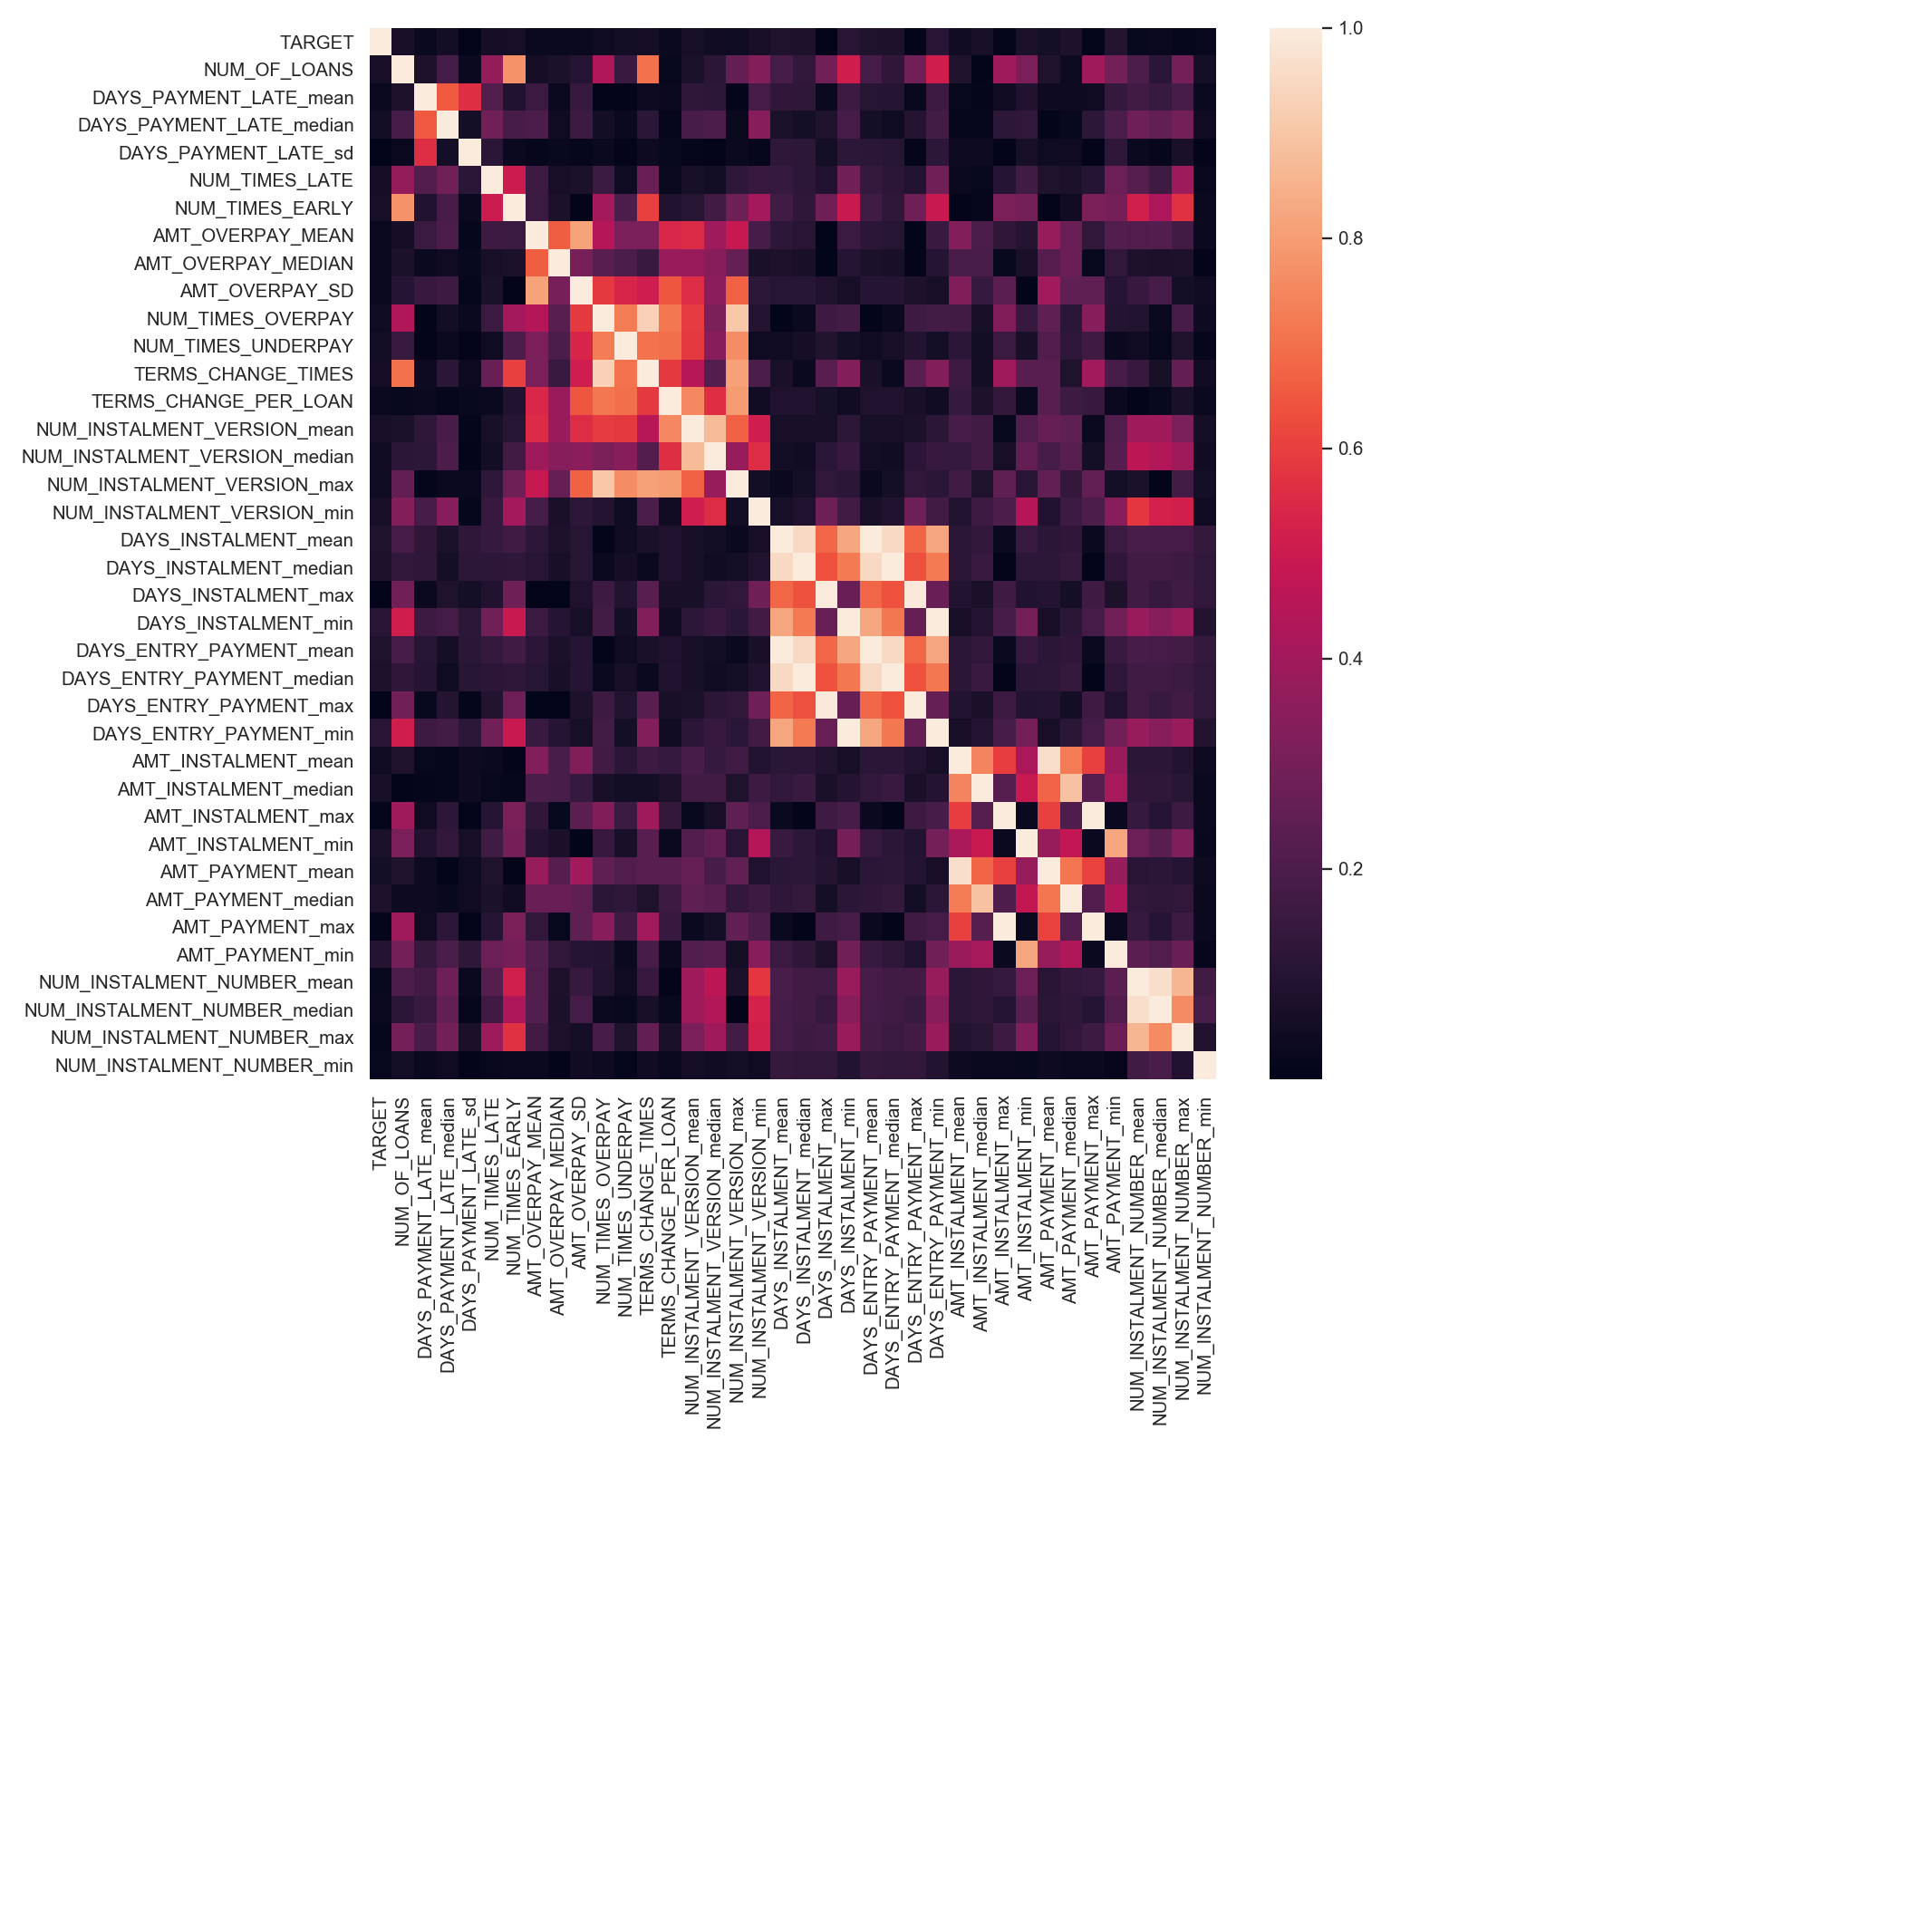

In [11]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(installments_payments_agg_final_df_wTargets_df, 10000, 0)

plt.figure(figsize= (12,12))
abs_corr_df = abs(this_sample.corr())
sns.heatmap(abs_corr_df, xticklabels= True, yticklabels= True)#, vmax=1, vmin = -1) #vmax=1, vmin = -1,
plt.tight_layout()

### nan counts - no info

In [12]:
def null_value_counts(df_in, feature):
    """Returns the fraction of TARGET = 0 and 1 for a given feature."""
    nan_counts = df_in[df_in[feature].isnull()]['TARGET'].value_counts()
    if nan_counts.size == 0:
        return None
    
    try: 
        val_0 = nan_counts.loc[0]
    except KeyError:
        val_0 = 0
    
    try:
        val_1 = nan_counts.loc[1]
    except KeyError:
        val_1 = 0
    
    tot = val_0 + val_1
    
    return [tot, val_0/tot, val_1/tot]

In [13]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(installments_payments_agg_final_df_wTargets_df, 10000, 0)

nan_dict = {}
for f in this_sample.columns:
    x = null_value_counts(this_sample, f)
    if x:
        nan_dict[f] = x

In [14]:
nan_df = pd.DataFrame( nan_dict)#, cols = )
nan_df = nan_df.transpose()
nan_df.columns = ['NaN counts','% TARGET = 0','% TARGET = 1']
pd.options.display.max_rows = 200
display(nan_df)
pd.options.display.max_rows = 60

NaN counts  % TARGET = 0  % TARGET = 1
NUM_OF_LOANS                        486.0      0.588477      0.411523
DAYS_PAYMENT_LATE_mean              486.0      0.588477      0.411523
DAYS_PAYMENT_LATE_median            486.0      0.588477      0.411523
DAYS_PAYMENT_LATE_sd                507.0      0.591716      0.408284
NUM_TIMES_LATE                      486.0      0.588477      0.411523
NUM_TIMES_EARLY                     486.0      0.588477      0.411523
AMT_OVERPAY_MEAN                    508.0      0.592520      0.407480
AMT_OVERPAY_MEDIAN                  508.0      0.592520      0.407480
AMT_OVERPAY_SD                      538.0      0.578067      0.421933
NUM_TIMES_OVERPAY                   486.0      0.588477      0.411523
NUM_TIMES_UNDERPAY                  486.0      0.588477      0.411523
TERMS_CHANGE_TIMES                  486.0      0.588477      0.411523
TERMS_CHANGE_PER_LOAN               486.0      0.588477      0.411523
NUM_INSTALMENT_VERSION_mean         486.0      0.588477      0.411523
NUM_INSTALMENT_VERSION_median       486.0      0.588477      0.411523
NUM_INSTALMENT_VERSION_max          486.0      0.588477      0.411523
NUM_INSTALMENT_VERSION_min          486.0      0.588477      0.411523
DAYS_INSTALMENT_mean                486.0      0.588477      0.411523
DAYS_INSTALMENT_median              486.0      0.588477      0.411523
DAYS_INSTALMENT_max                 486.0      0.588477      0.411523
DAYS_INSTALMENT_min                 486.0      0.588477      0.411523
DAYS_ENTRY_PAYMENT_mean             486.0      0.588477      0.411523
DAYS_ENTRY_PAYMENT_median           486.0      0.588477      0.411523
DAYS_ENTRY_PAYMENT_max              486.0      0.588477      0.411523
DAYS_ENTRY_PAYMENT_min              486.0      0.588477      0.411523
AMT_INSTALMENT_mean                 486.0      0.588477      0.411523
AMT_INSTALMENT_median               486.0      0.588477      0.411523
AMT_INSTALMENT_max                  486.0      0.588477      0.411523
AMT_INSTALMENT_min                  486.0      0.588477      0.411523
AMT_PAYMENT_mean                    486.0      0.588477      0.411523
AMT_PAYMENT_median                  486.0      0.588477      0.411523
AMT_PAYMENT_max                     486.0      0.588477      0.411523
AMT_PAYMENT_min                     486.0      0.588477      0.411523
NUM_INSTALMENT_NUMBER_mean          486.0      0.588477      0.411523
NUM_INSTALMENT_NUMBER_median        486.0      0.588477      0.411523
NUM_INSTALMENT_NUMBER_max           486.0      0.588477      0.411523
NUM_INSTALMENT_NUMBER_min           486.0      0.588477      0.411523

## plots (only floats to plot)

In [40]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(installments_payments_agg_final_df_wTargets_df, 10000, 0)

In [17]:
slice_at = 19

<IPython.core.display.Javascript object>


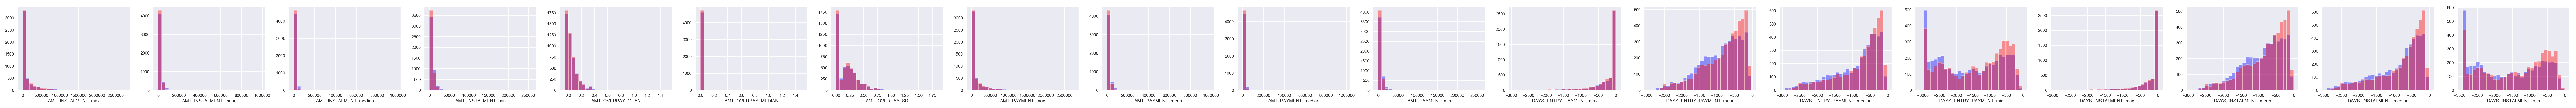

In [18]:
# PLOT FIRST HALF FLOAT FEATURES

my_list = float_feats[:slice_at]
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):
    
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]
    
    #keep data within 3 SDs of mean
    dat_0 = dat_0[~((dat_0-dat_0.mean()).abs() > 3*dat_0.std())]
    dat_1 = dat_1[~((dat_1-dat_1.mean()).abs() > 3*dat_1.std())]
    
#     #divv = 40
#     bw_0 = np.std(dat_0)/3
#     bw_1 = np.std(dat_1)/3
    
    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] #, 'fd'
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)#, bw =bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a],kde = False, bins = my_bins)#, bw =bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
#     if f =='AMT_CREDIT_SUM_max':
#         #g1.set_ylim(10**4.3, 10**7)
#         g1.set_xlim(1, 10**7)
    
   # g0.set_xticklabels(g.get_xticklabels(),rotation = 80)

plt.tight_layout()

<IPython.core.display.Javascript object>


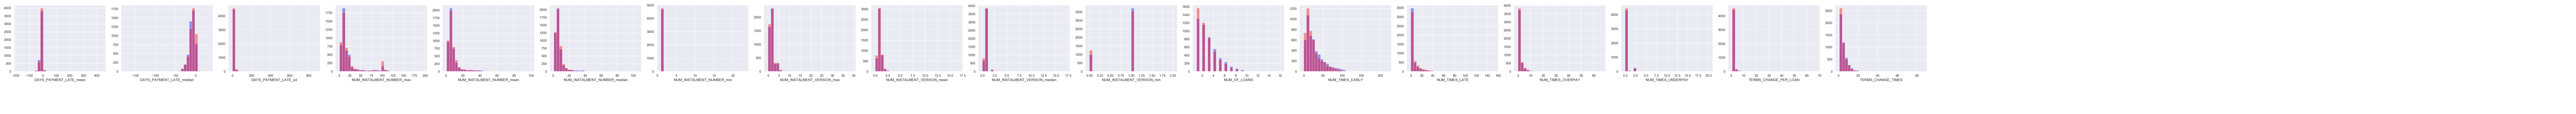

In [19]:
# PLOT SECOND HALF FLOAT FEATURES

my_list = float_feats[slice_at:]
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):
    
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]
    
    #keep data within 3 SDs of mean
    dat_0 = dat_0[~((dat_0-dat_0.mean()).abs() > 3*dat_0.std())]
    dat_1 = dat_1[~((dat_1-dat_1.mean()).abs() > 3*dat_1.std())]
    
#     #divv = 40
#     bw_0 = np.std(dat_0)/3
#     bw_1 = np.std(dat_1)/3
    
    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] #, 'fd'
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)#, bw =bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a],kde = False, bins = my_bins)#, bw =bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
#     if f =='AMT_CREDIT_SUM_max':
#         #g1.set_ylim(10**4.3, 10**7)
#         g1.set_xlim(1, 10**7)
    
   # g0.set_xticklabels(g.get_xticklabels(),rotation = 80)

plt.tight_layout()

## final features in consideration

In [20]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(installments_payments_agg_final_df_wTargets_df, 10000, 0)

In [21]:
feats = this_sample.columns
len(feats)

38

In [133]:
def log_modulus_transformation(x):
    return np.sign(x)*np.log10( np.abs(x)+1)

def pwr_transformation(x,pwr):
    return np.sign(x)*( np.abs(x) )**pwr

def basic_plots(feat, pwr, bins_div):
    feat = feat
    this_sample['LogMod_'+ feat] = log_modulus_transformation(this_sample[feat])
    this_sample['pwr_'+ feat] = pwr_transformation(this_sample[feat], pwr)

    my_list = [feat, 'LogMod_'+feat, 'pwr_'+ feat]
    num_plots = len(my_list)

    fig, axs = plt.subplots(nrows = 1,
                            ncols = num_plots,
                            figsize = (num_plots*5,  4));

    for f, a in zip(my_list, range(len(my_list))):   
        dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
        dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]

        my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = bins_div )[1] 

        g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)
        g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)

    plt.tight_layout()

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


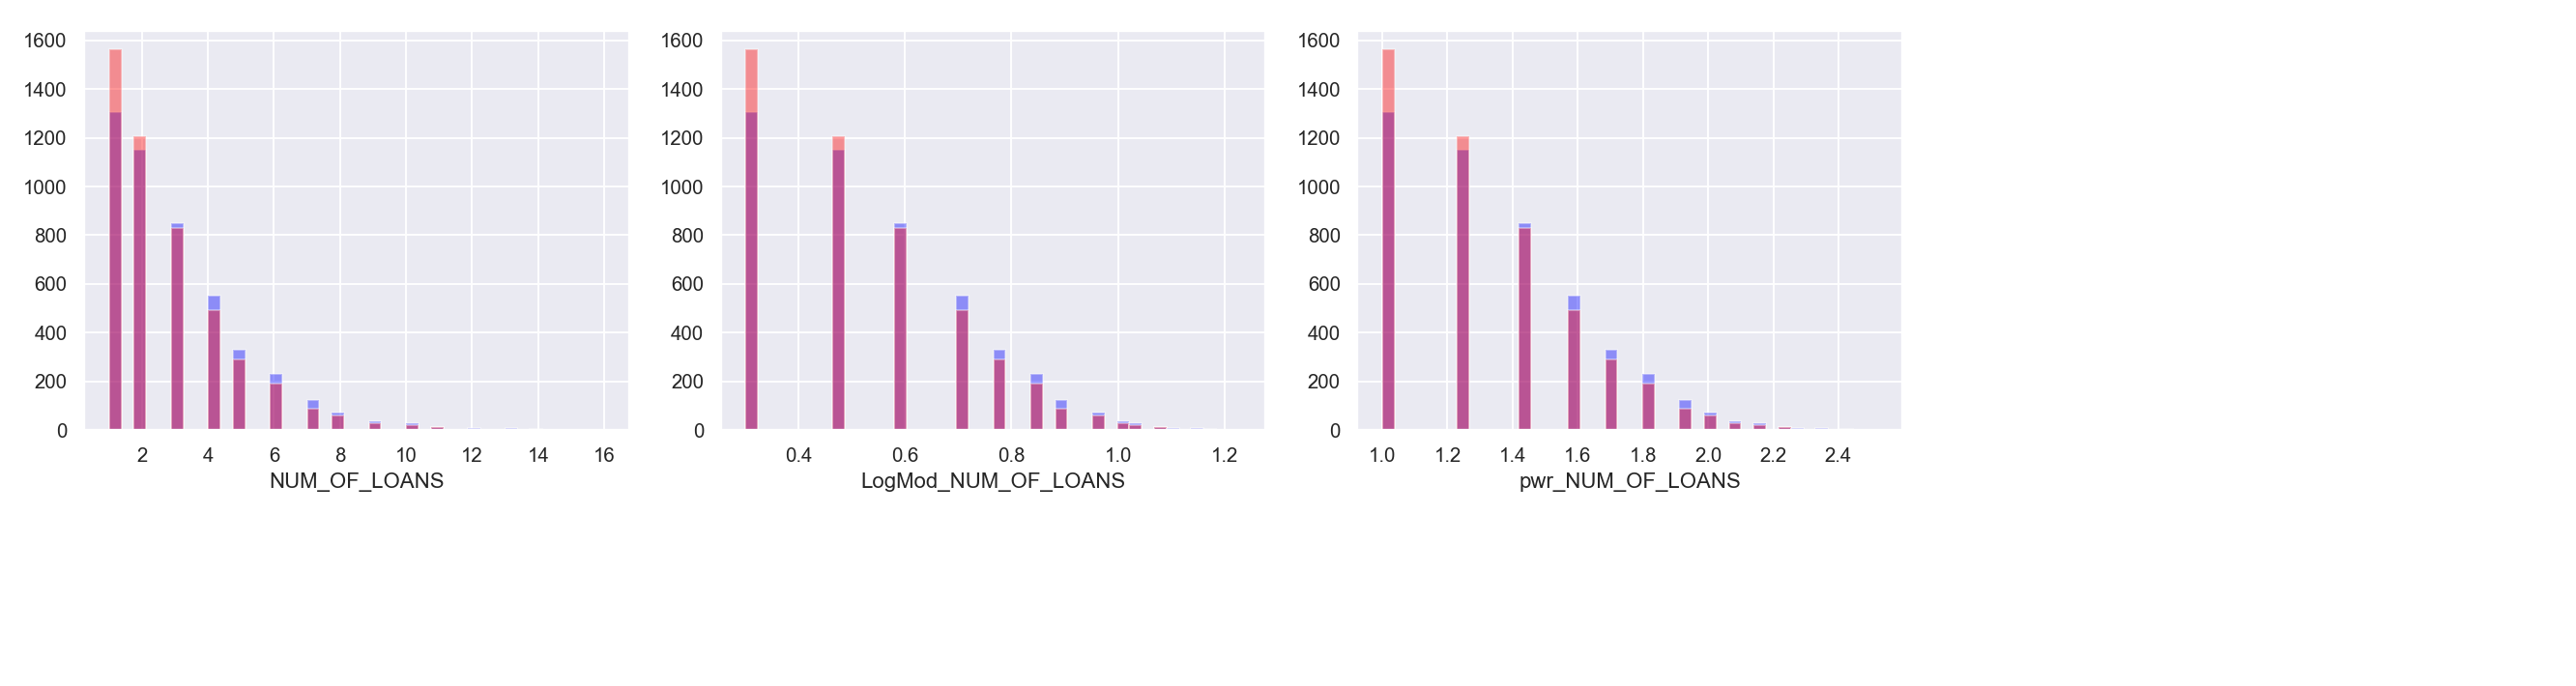

In [134]:
basic_plots(feats[1], 1/3, 40)

In [110]:
# median below has bettter spread
#basic_plots(feats[2], +1, 1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


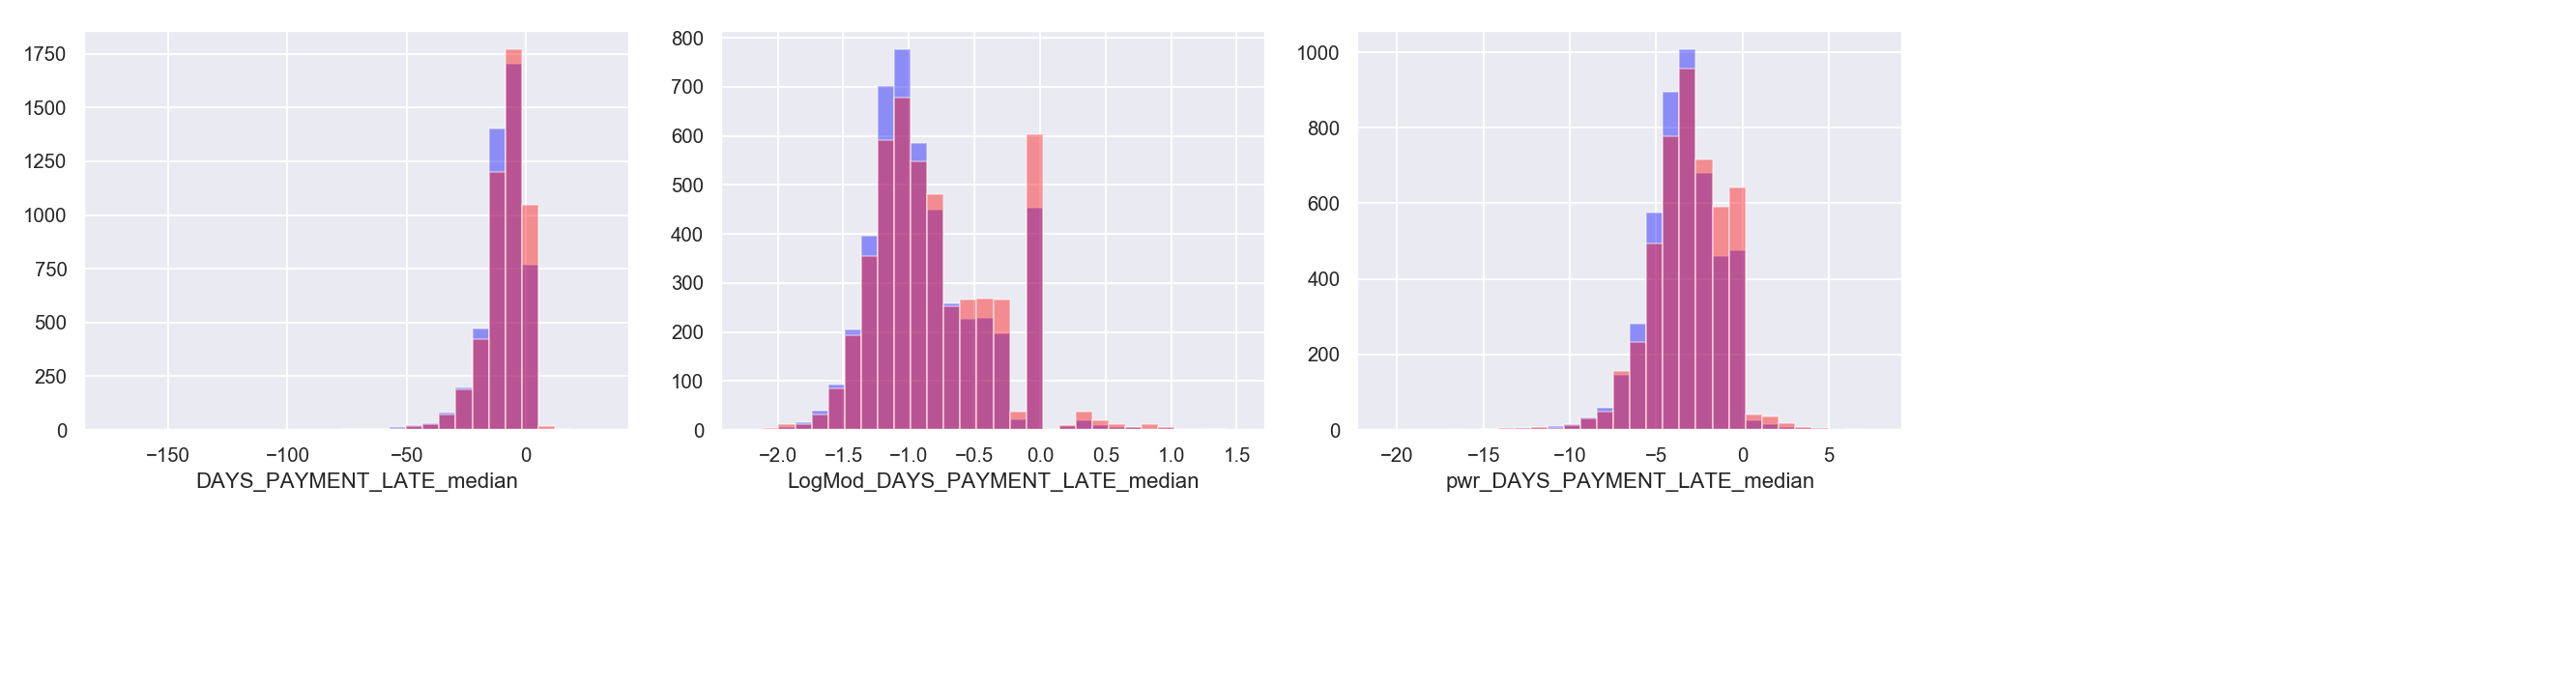

In [232]:
basic_plots(feats[3], 1/1.7, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


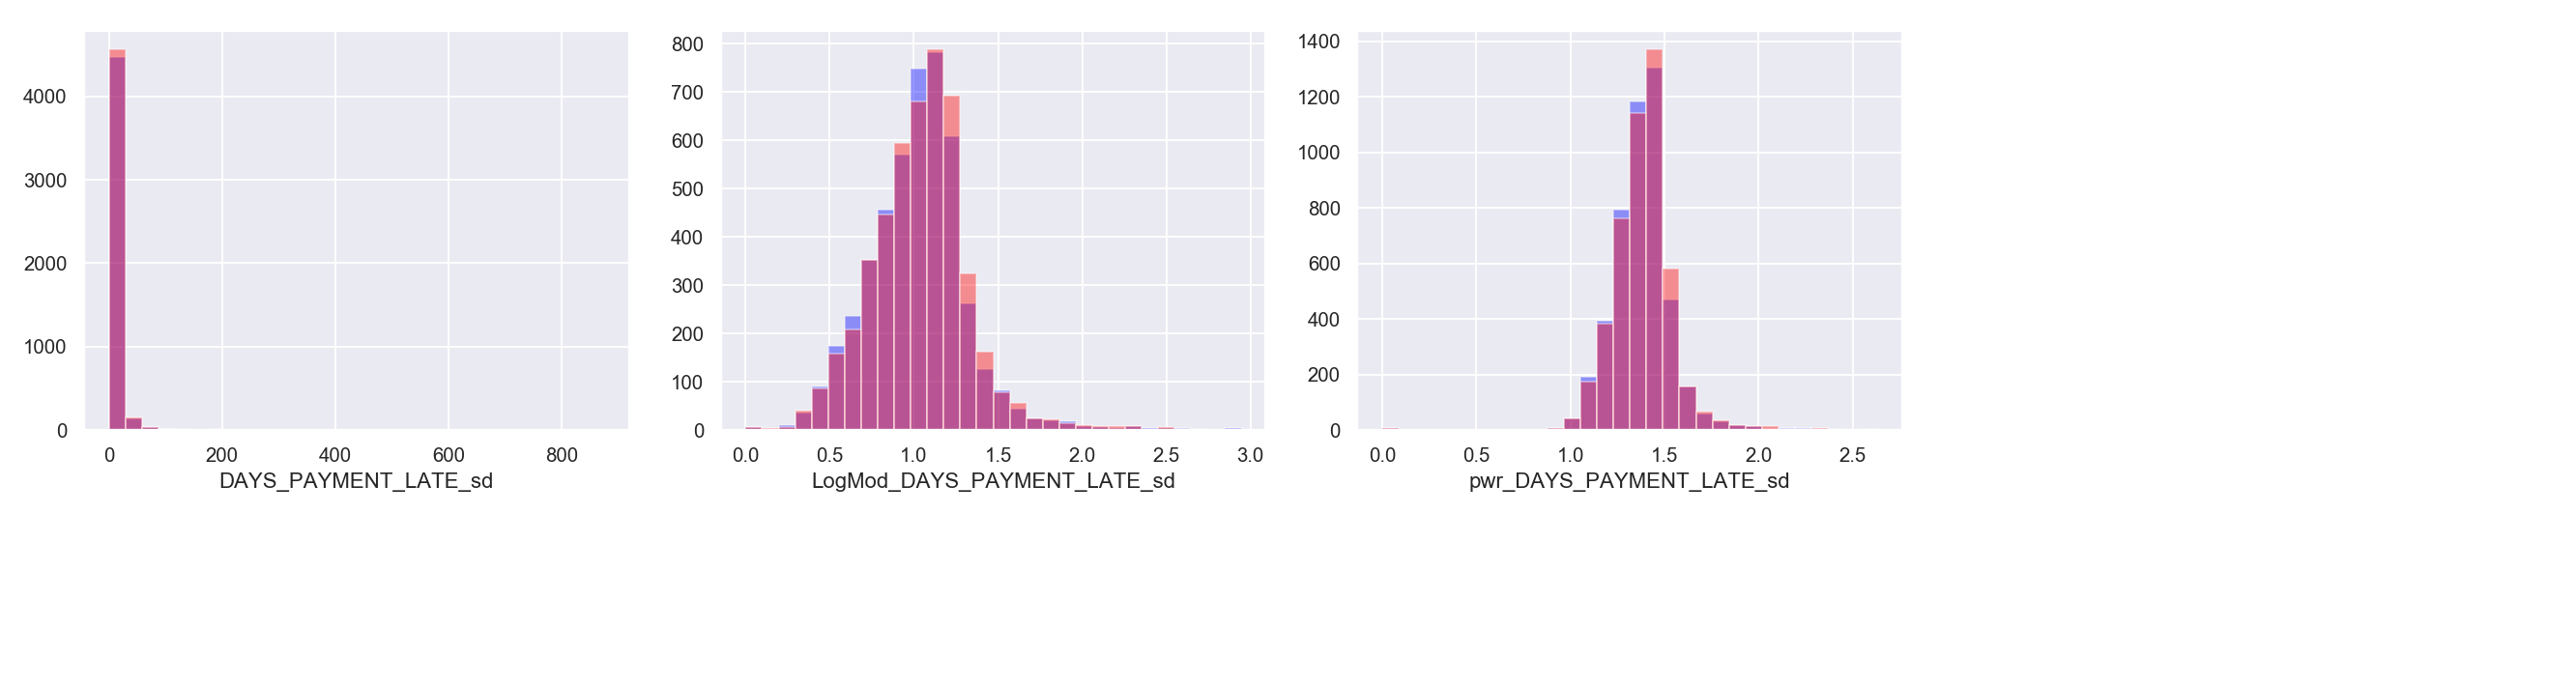

In [241]:
basic_plots(feats[4], 1/7, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


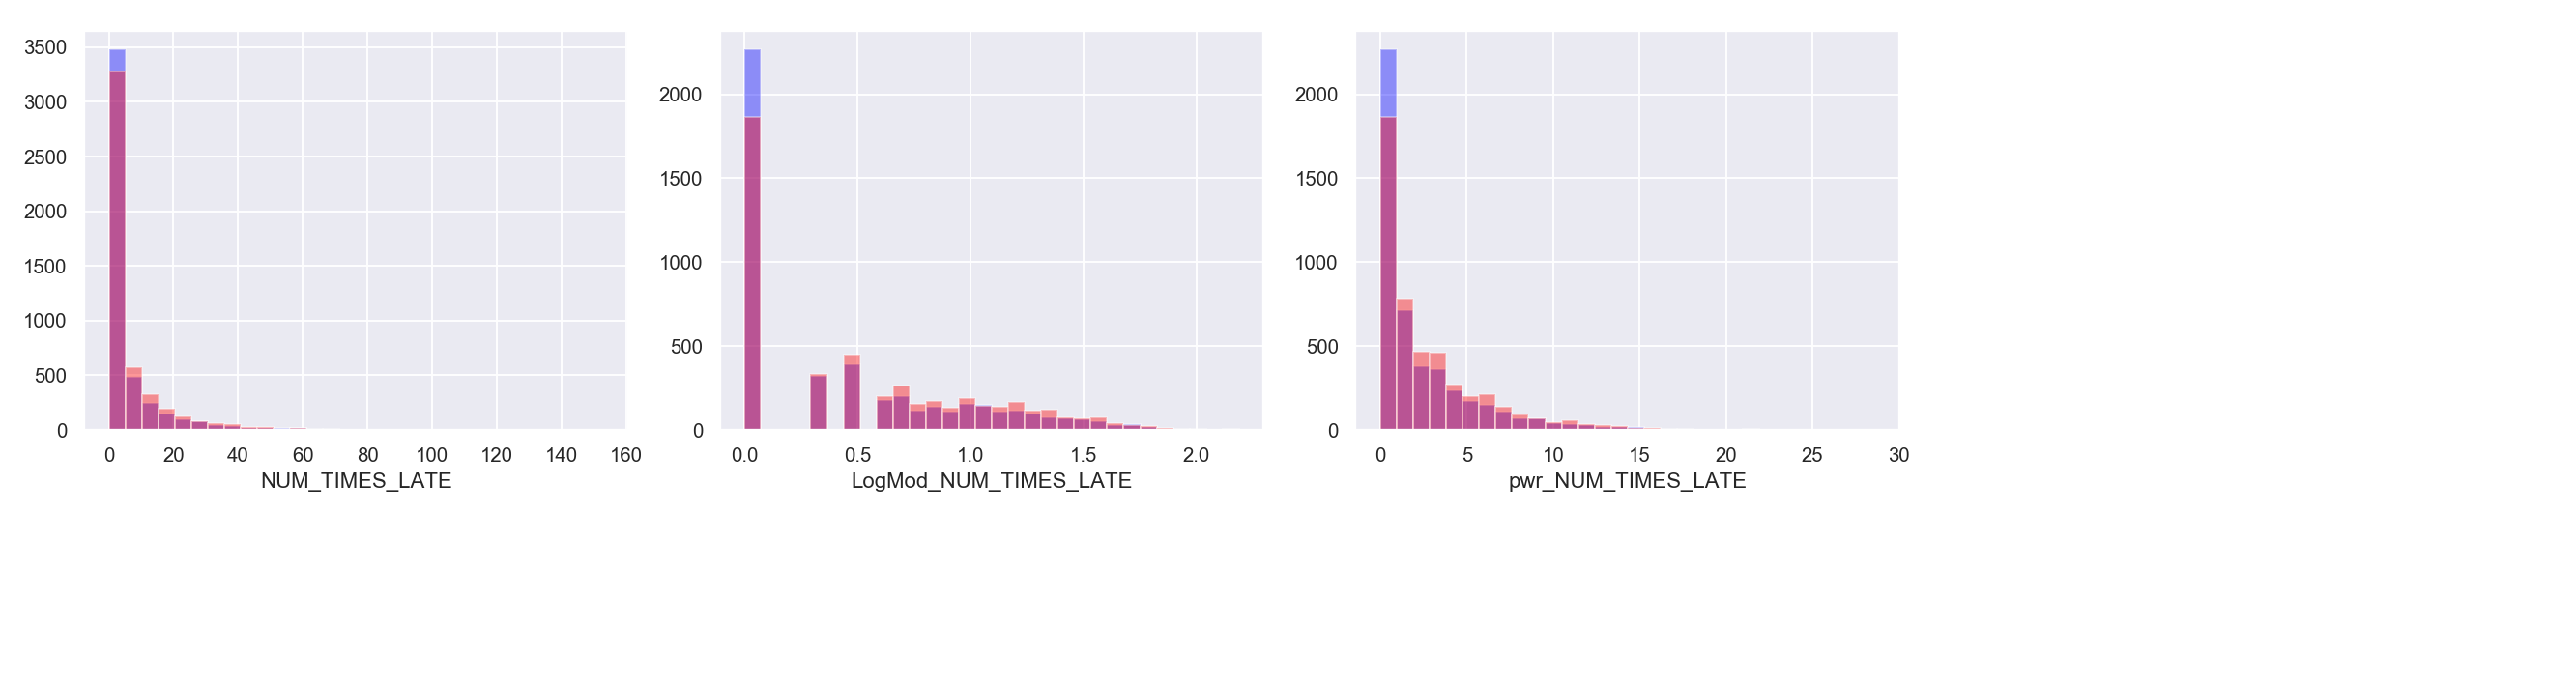

In [238]:
basic_plots(feats[5], 1/1.5, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


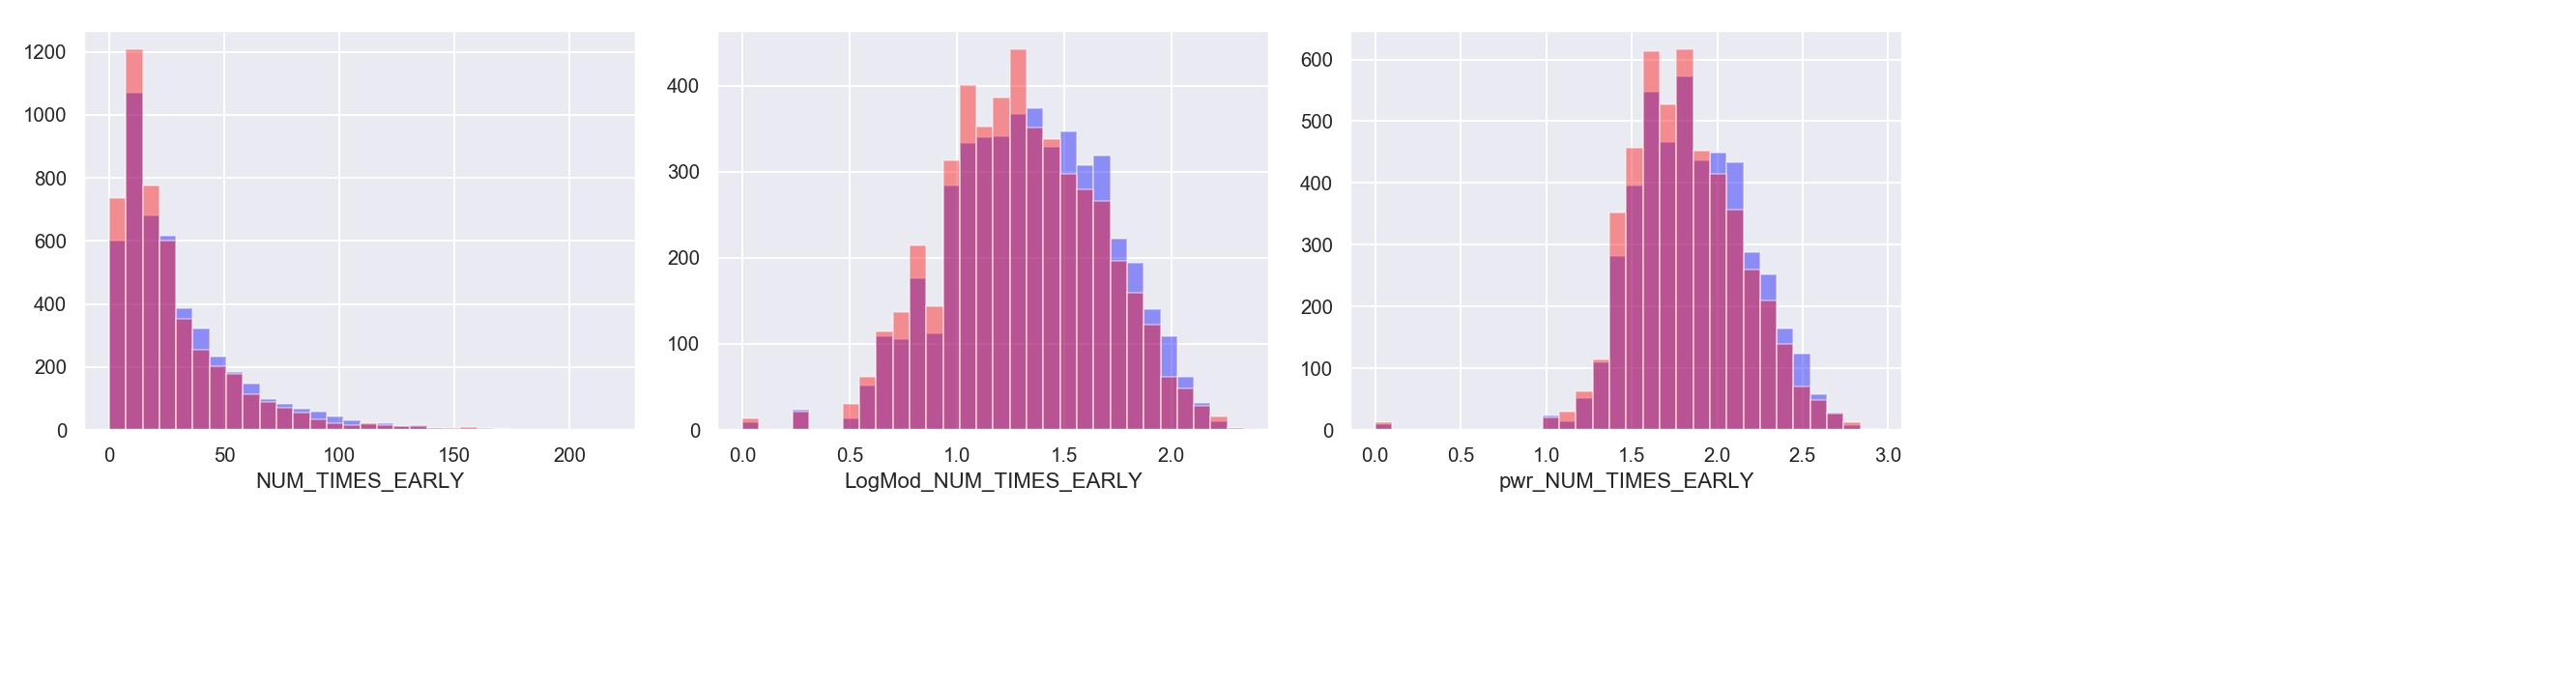

In [138]:
basic_plots(feats[6],  1/5, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


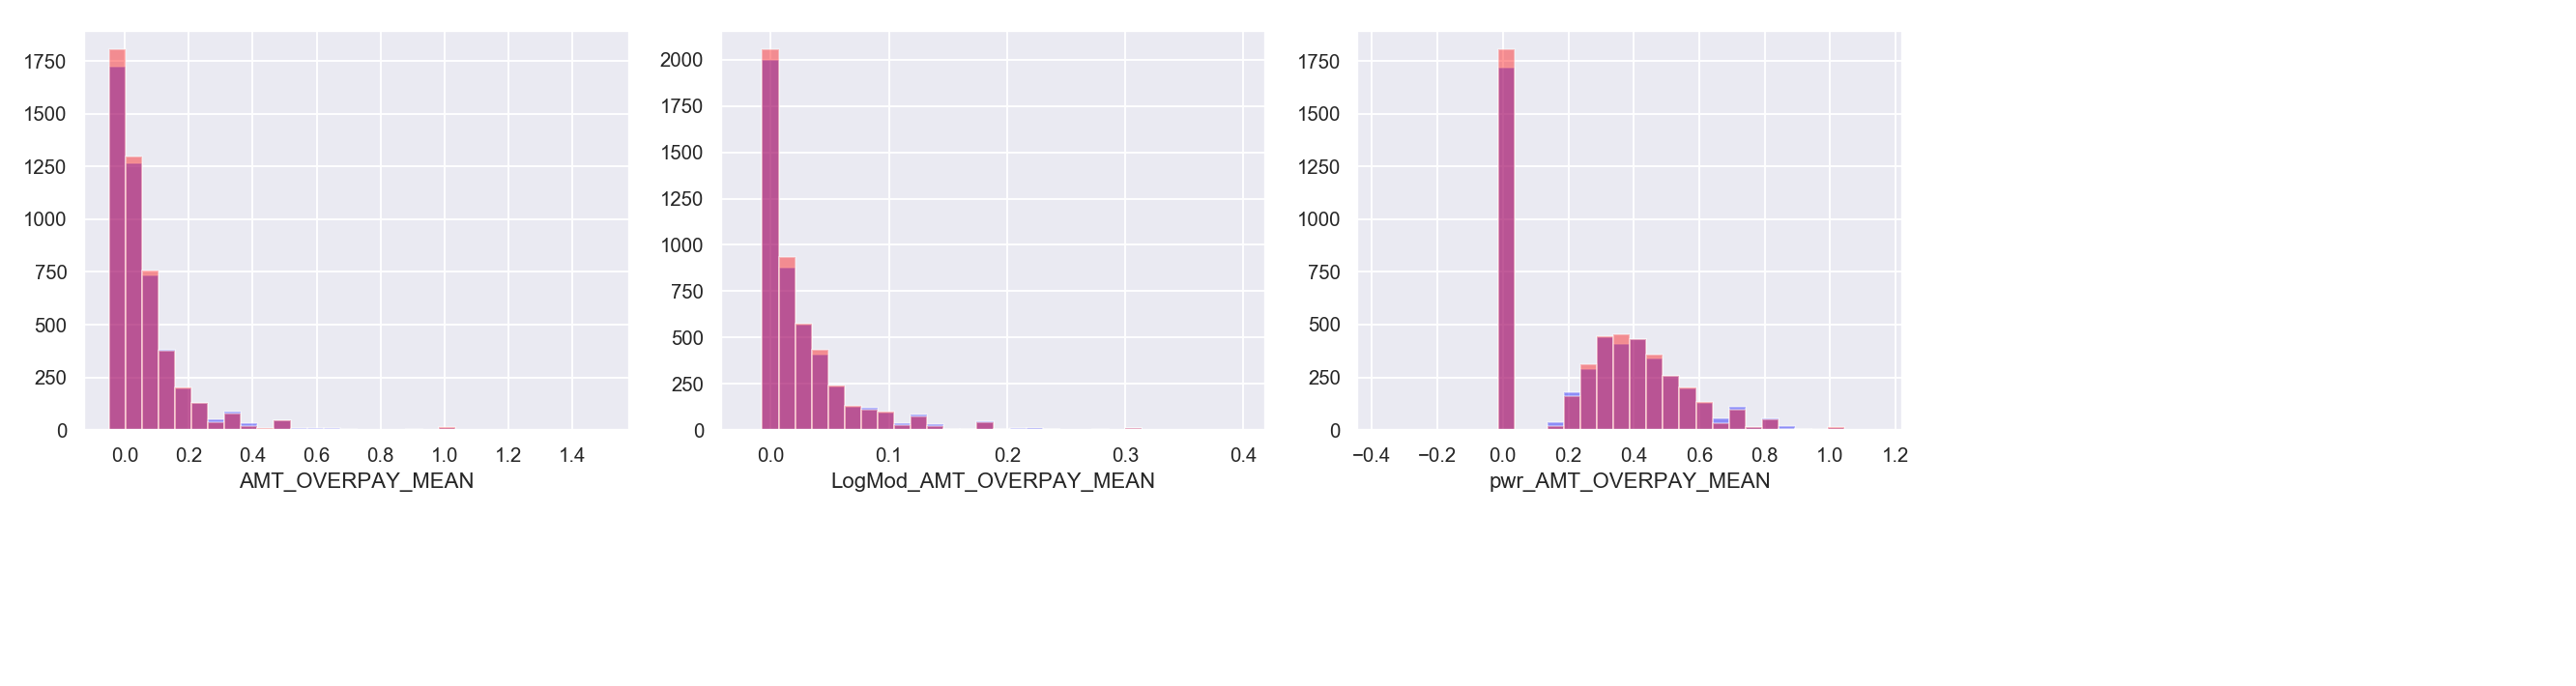

In [139]:
basic_plots(feats[7],  1/3, 30)

In [124]:
# no info
#basic_plots(feats[8], -1, 1/1.3, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


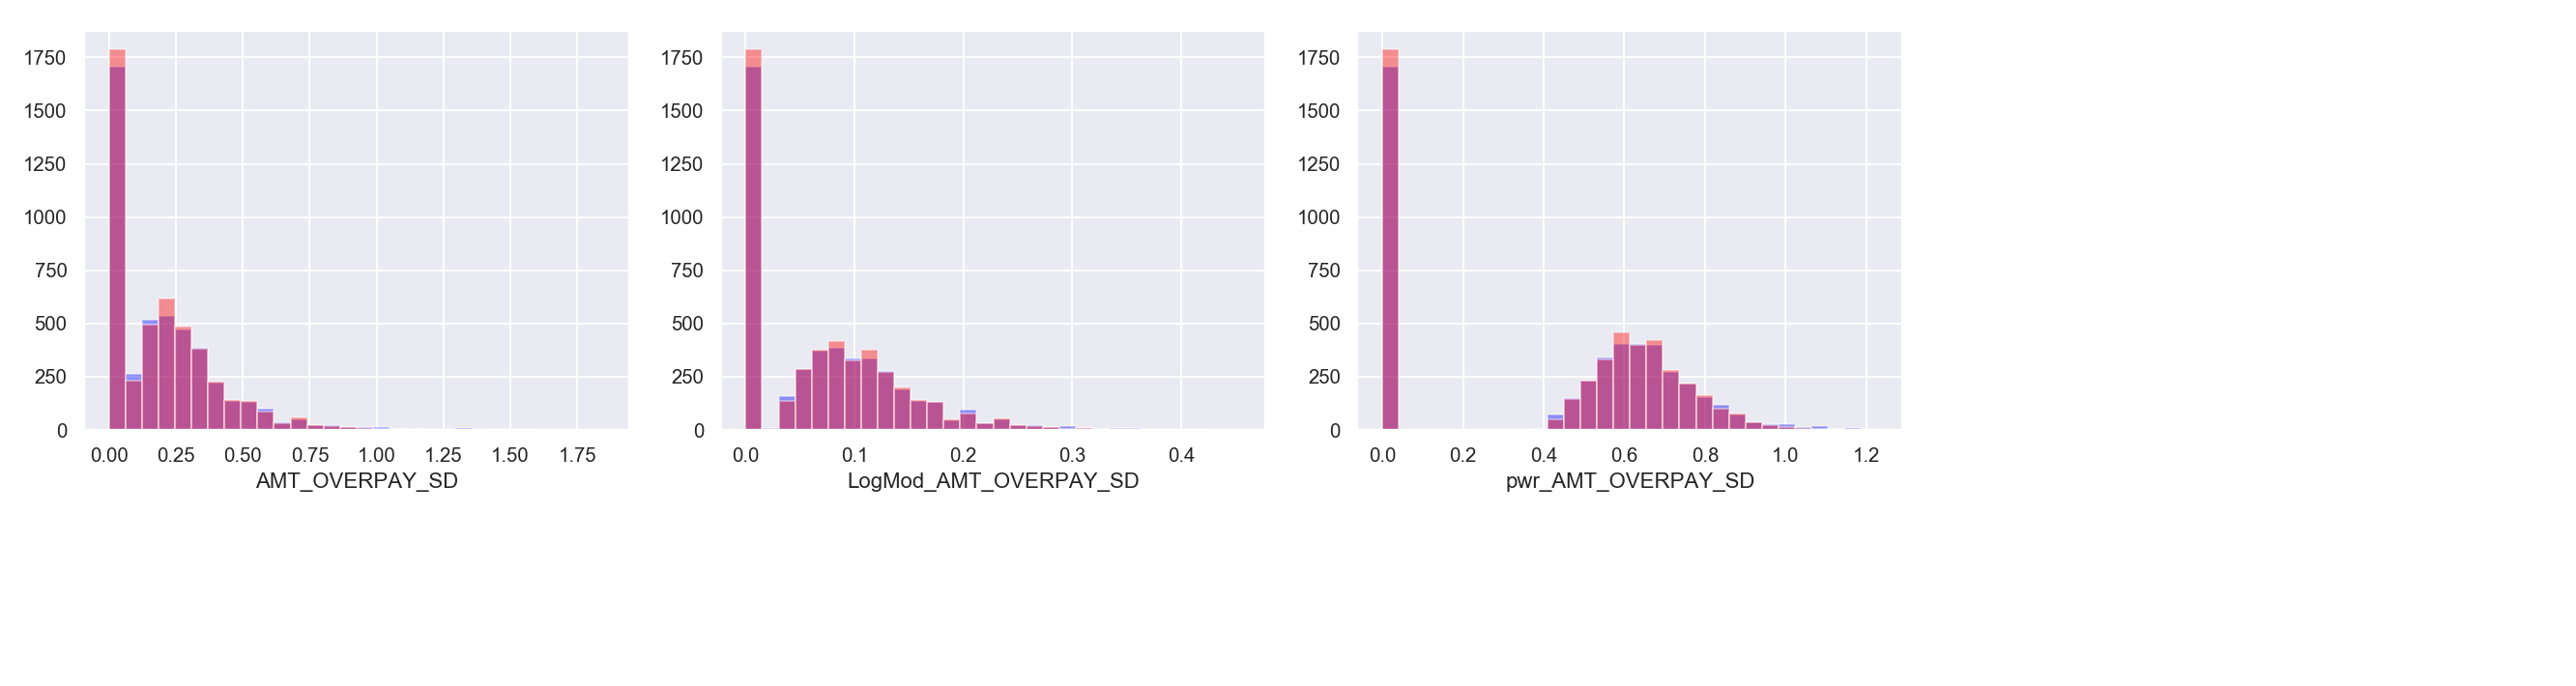

In [140]:
basic_plots(feats[9], 1/3, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


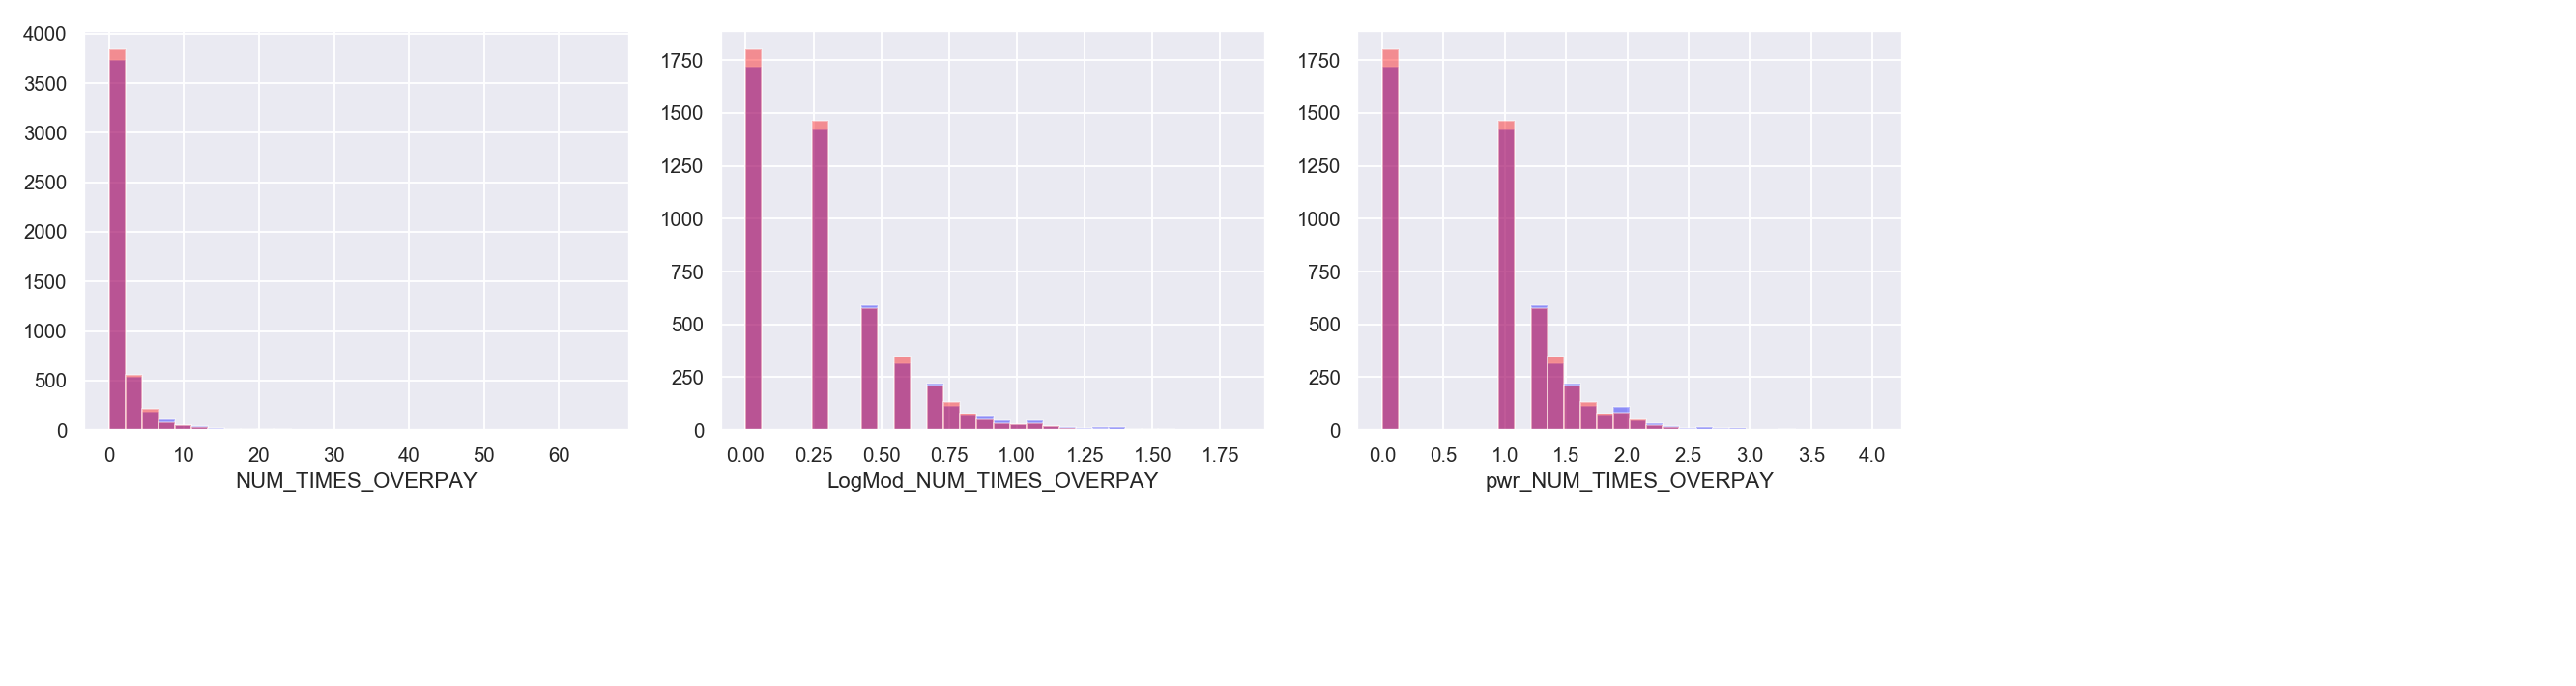

In [141]:
basic_plots(feats[10],  1/3, 30)

In [170]:
# this has no spread
# basic_plots(feats[11],  1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


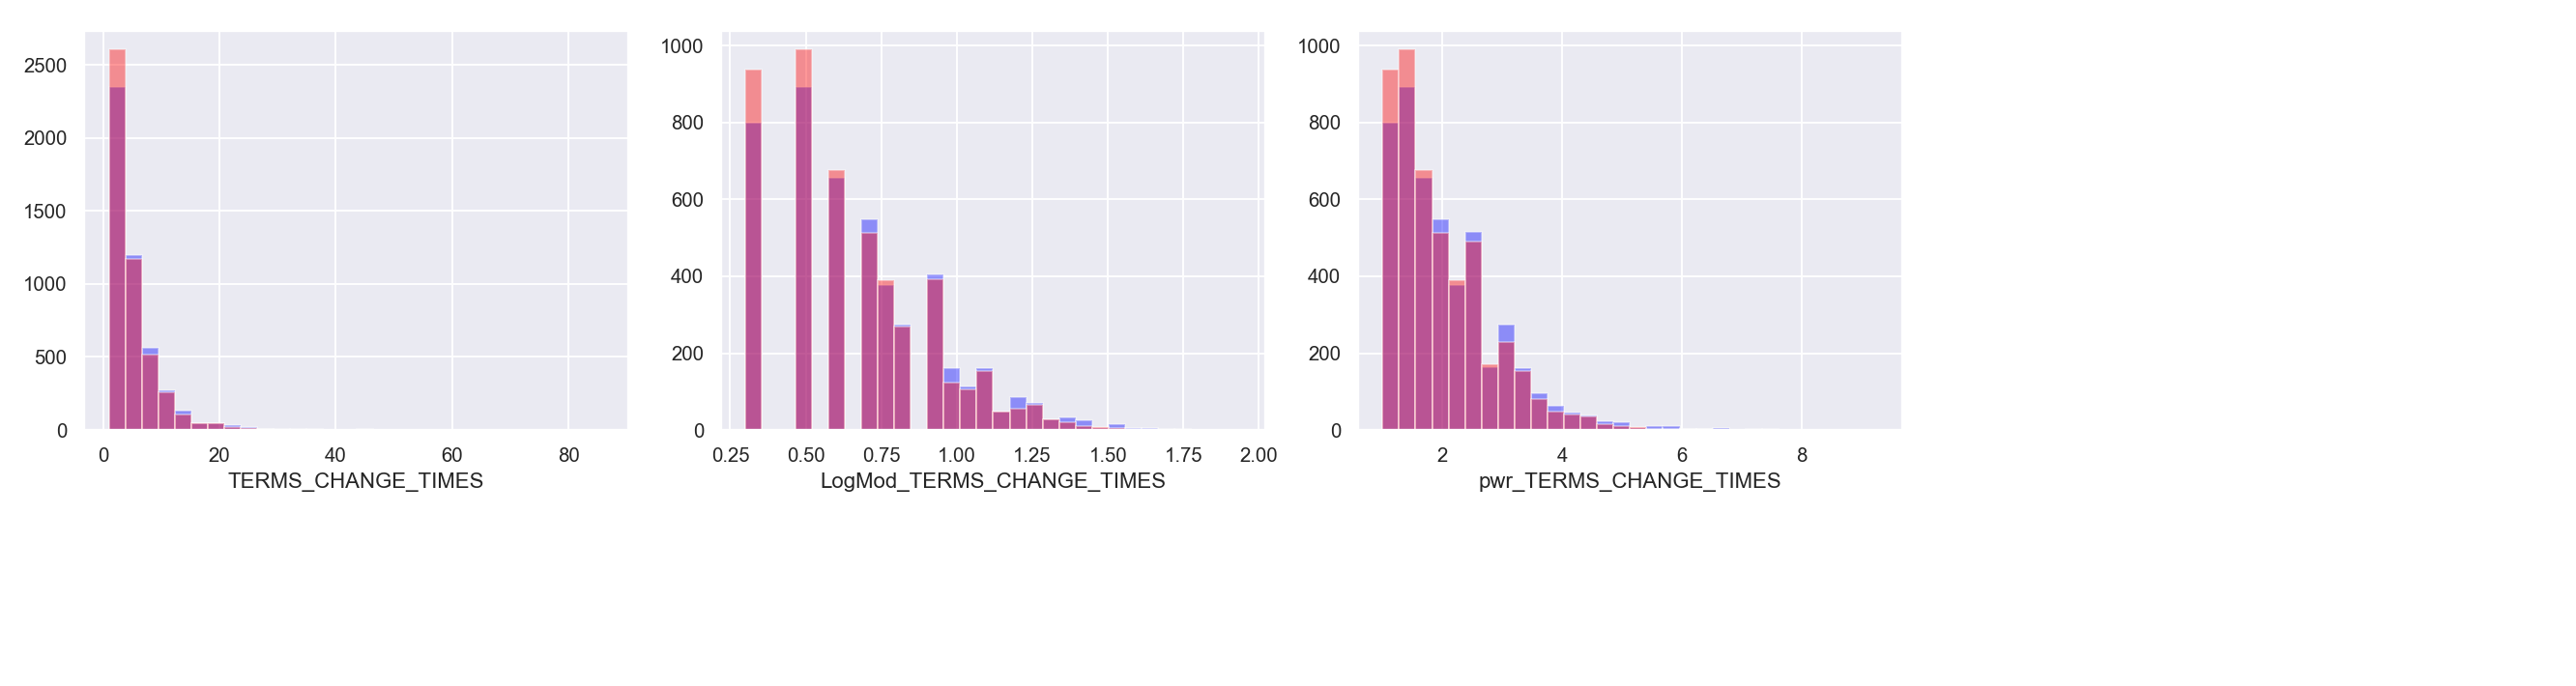

In [246]:
basic_plots(feats[12],  1/2, 30)

In [227]:
# just go w TERMS_CHANGE_TIMES
#basic_plots(feats[13], 1/5, 30)

In [178]:
# not much spread
#basic_plots(feats[14], 1/1.5, 30)

In [179]:
# no spread
#basic_plots(feats[15], 1/10, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


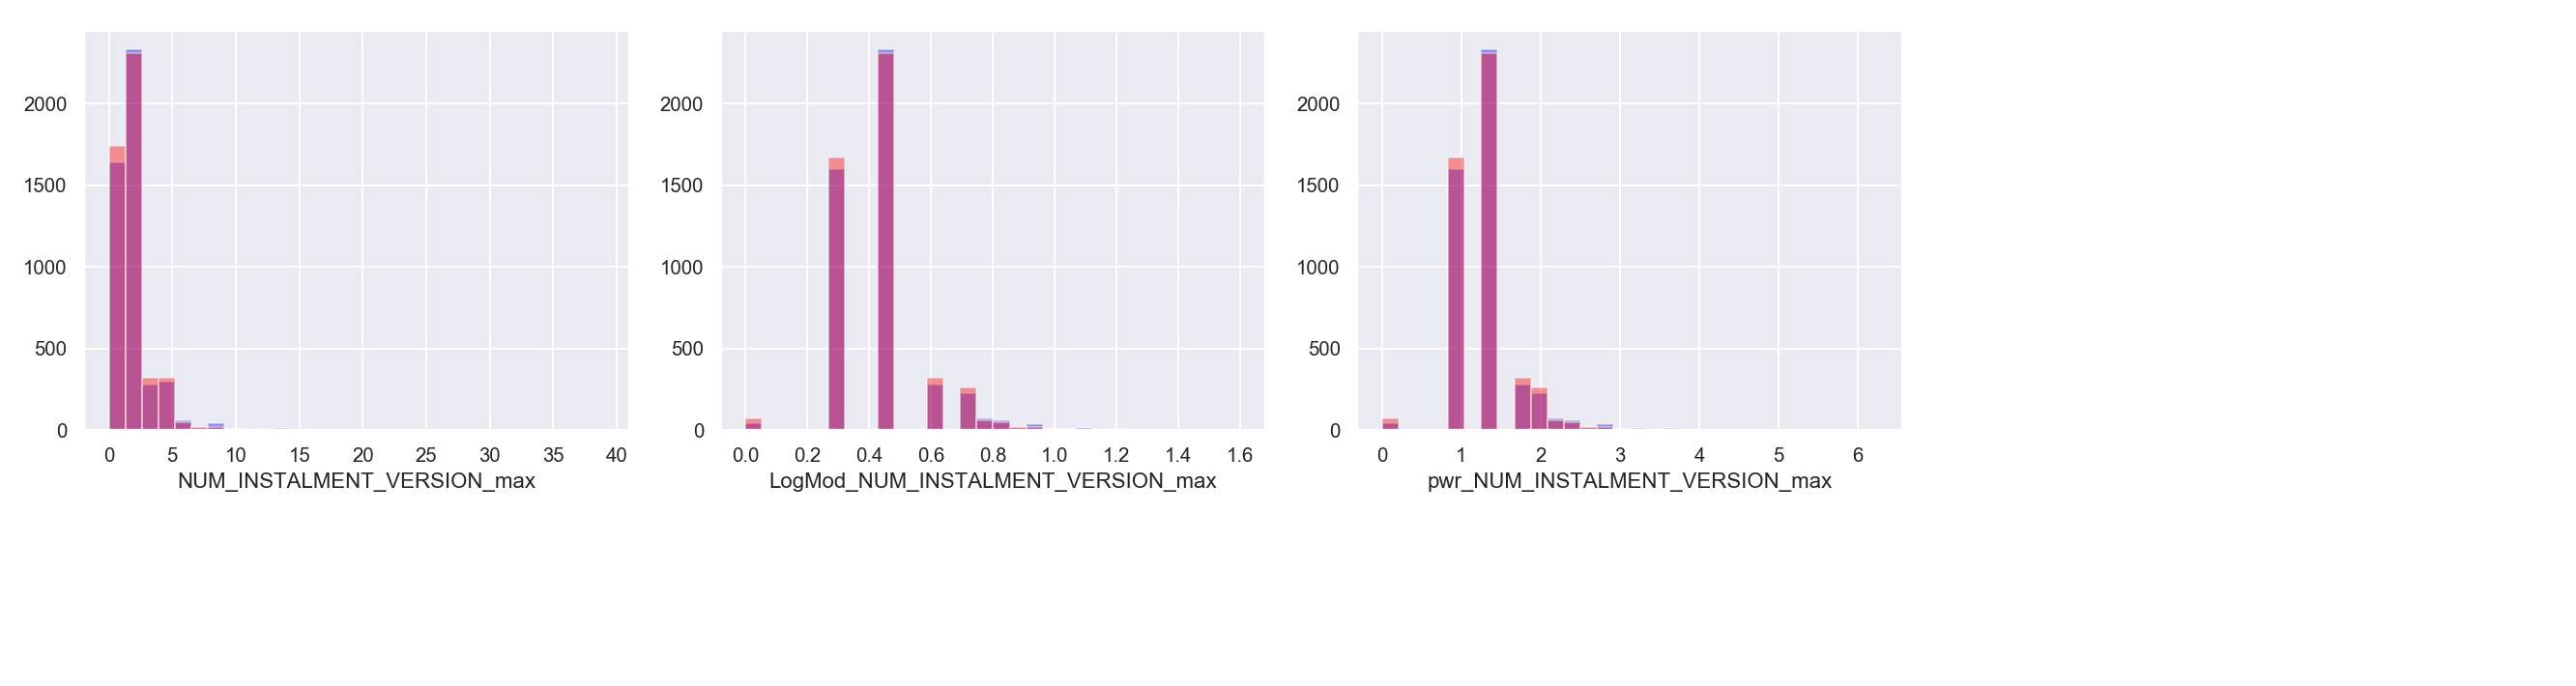

In [180]:
basic_plots(feats[16], 1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


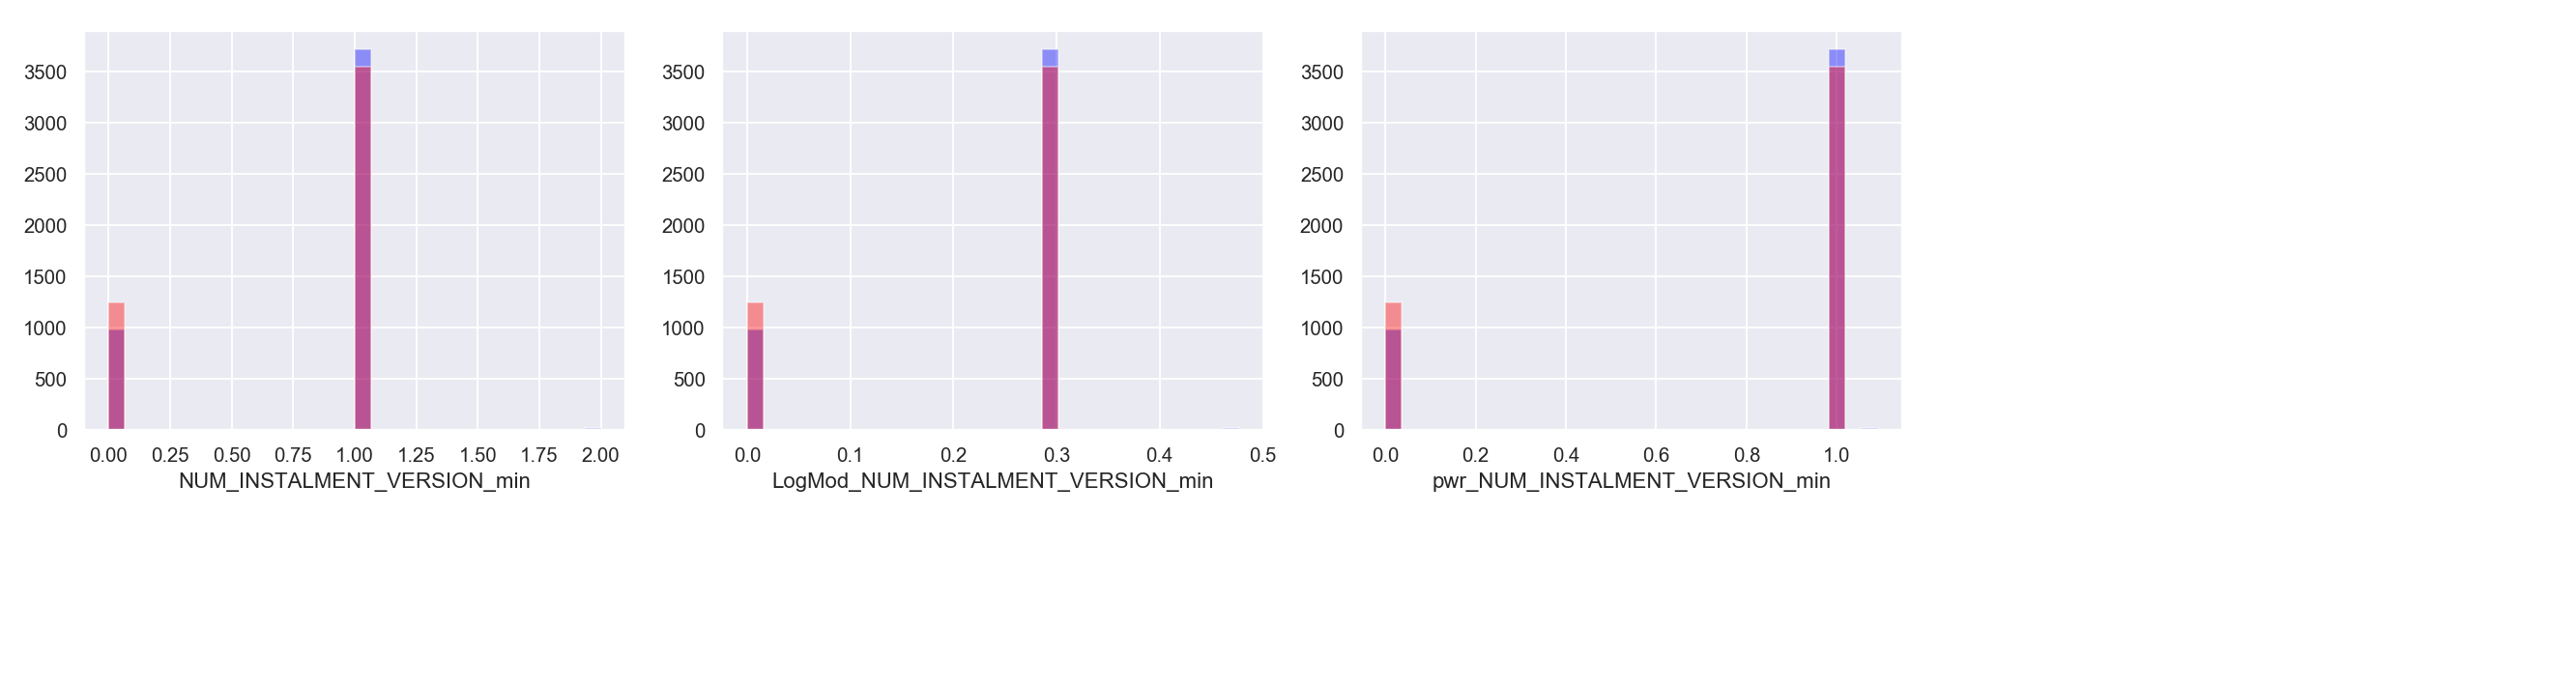

In [148]:
basic_plots(feats[17], 1/8, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


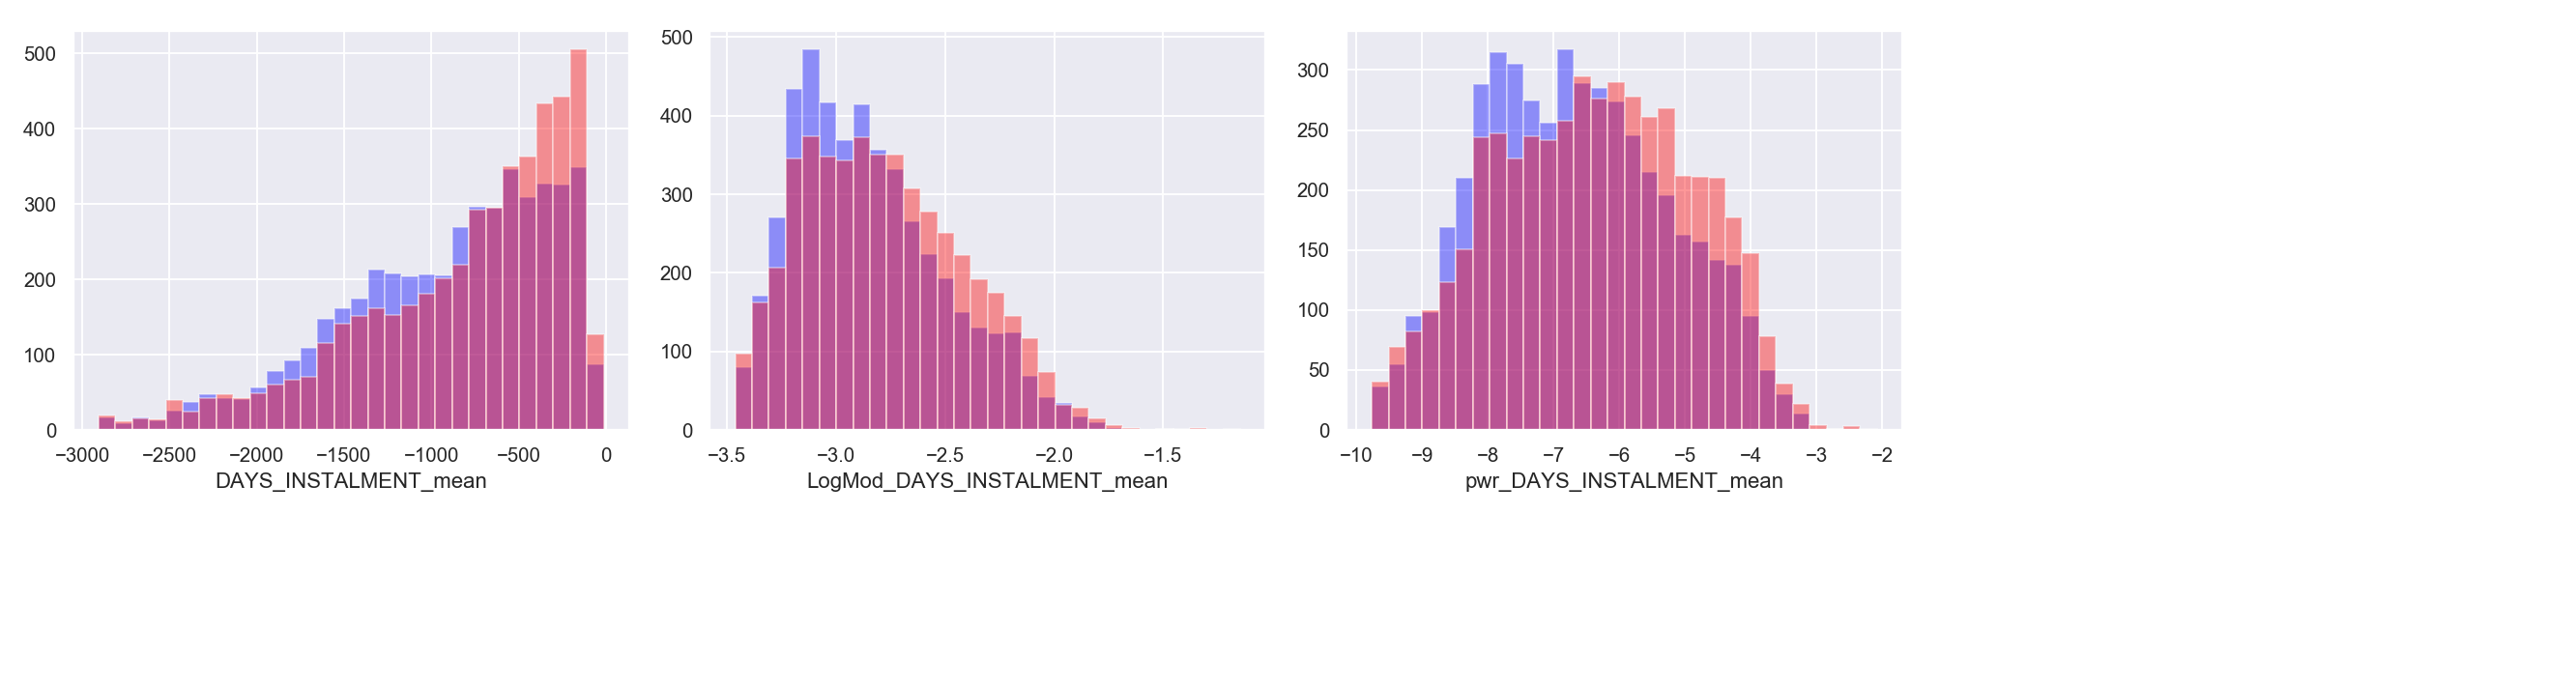

In [191]:
basic_plots(feats[18],  1/3.5, 30)

In [195]:
# just use mean above
#basic_plots(feats[19], 1/4, 30)

In [196]:
# no TARGET trend
#basic_plots(feats[20],  1/5, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


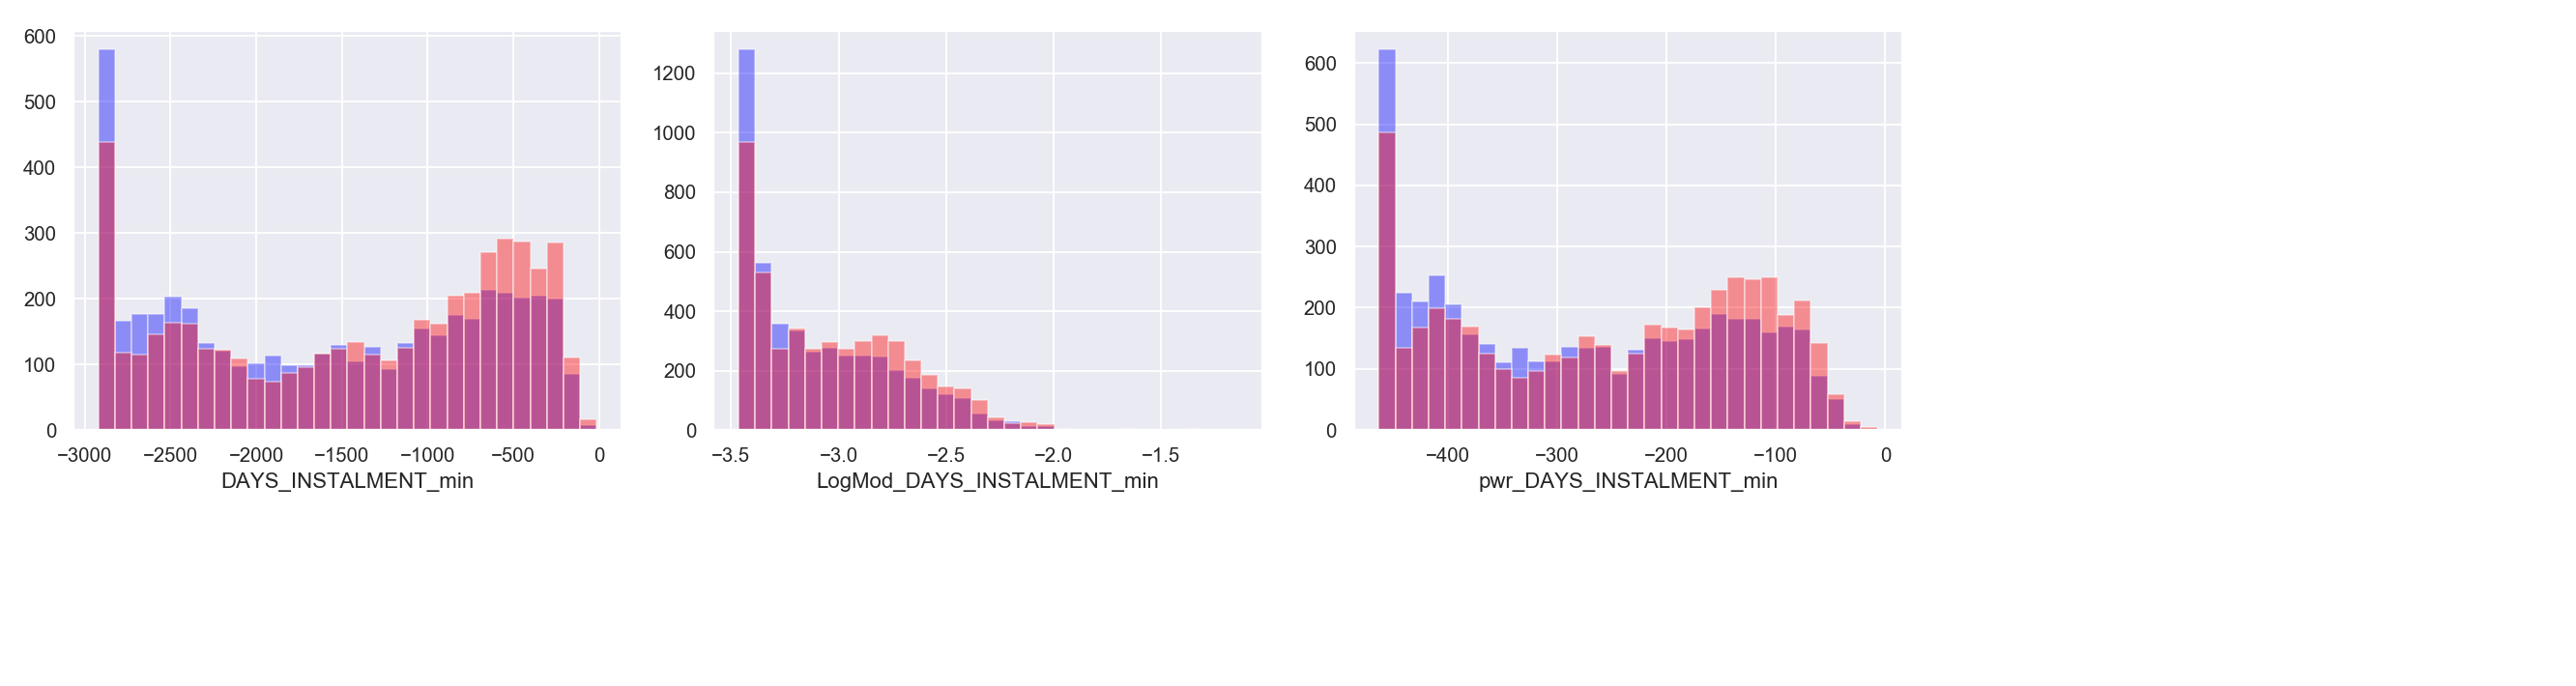

In [199]:
basic_plots(feats[21], 1/1.3, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


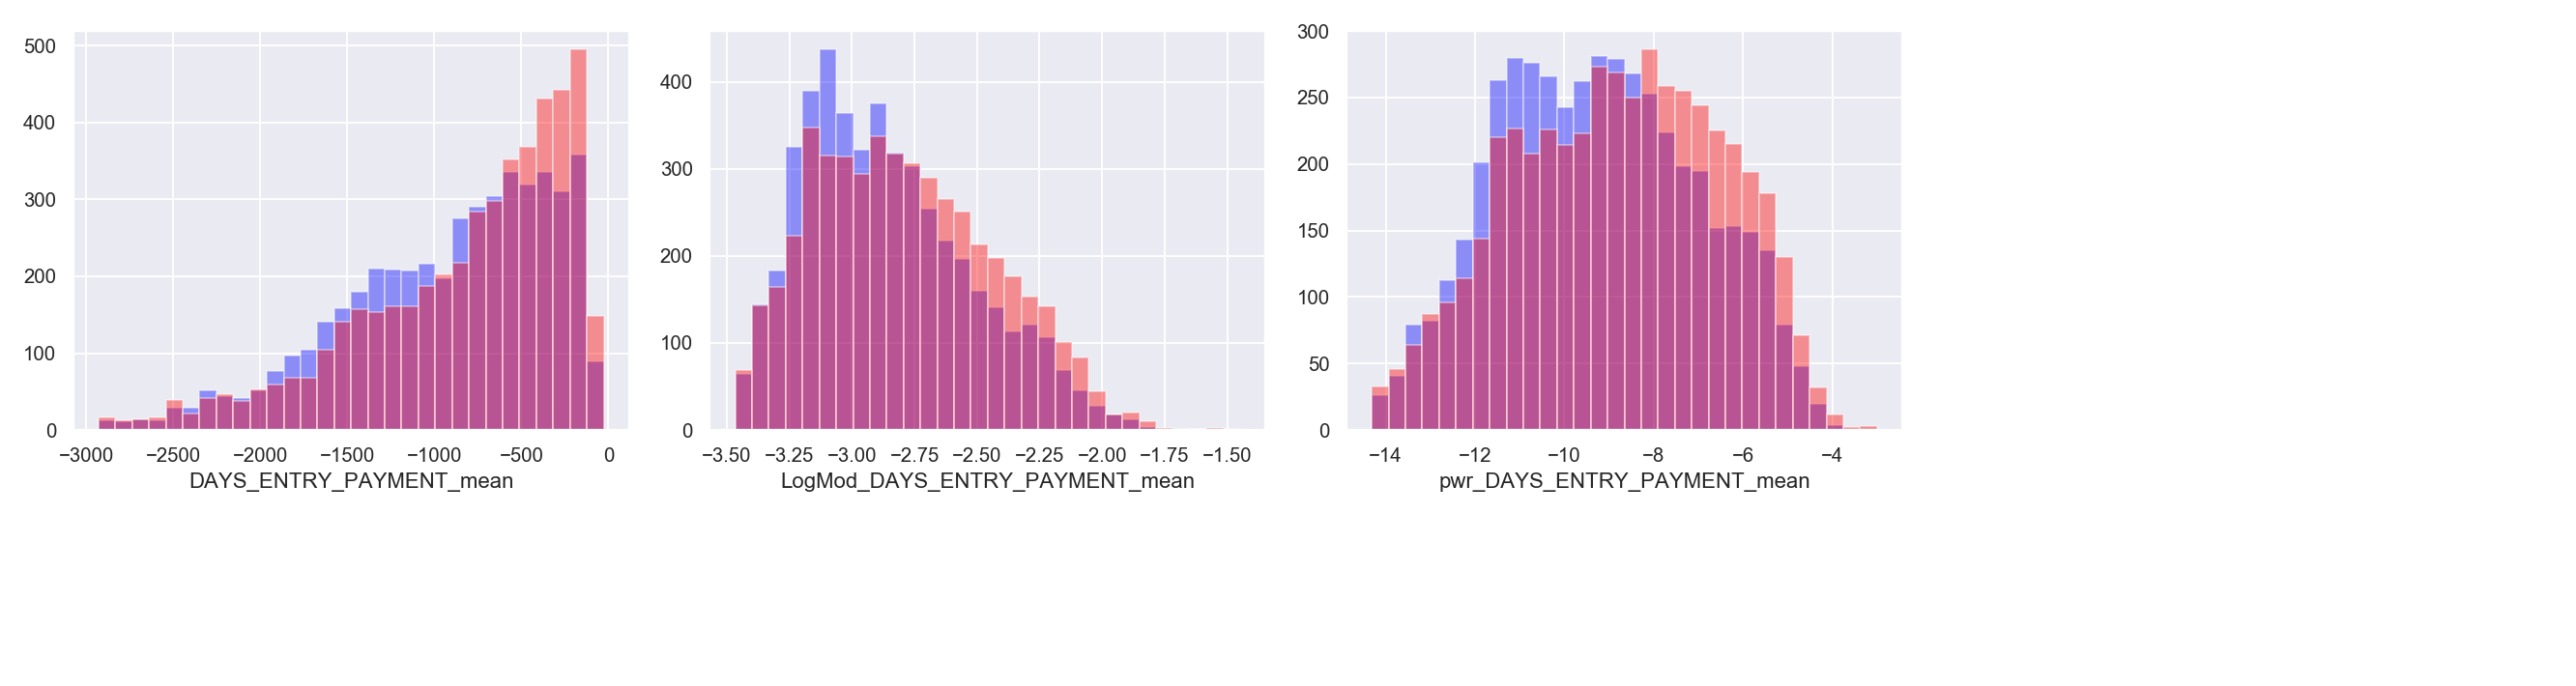

In [200]:
basic_plots(feats[22], 1/3, 30)

In [203]:
# just use mean above
#basic_plots(feats[23], 1/4, 30)

In [205]:
# no TARGET trend
# basic_plots(feats[24], 1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


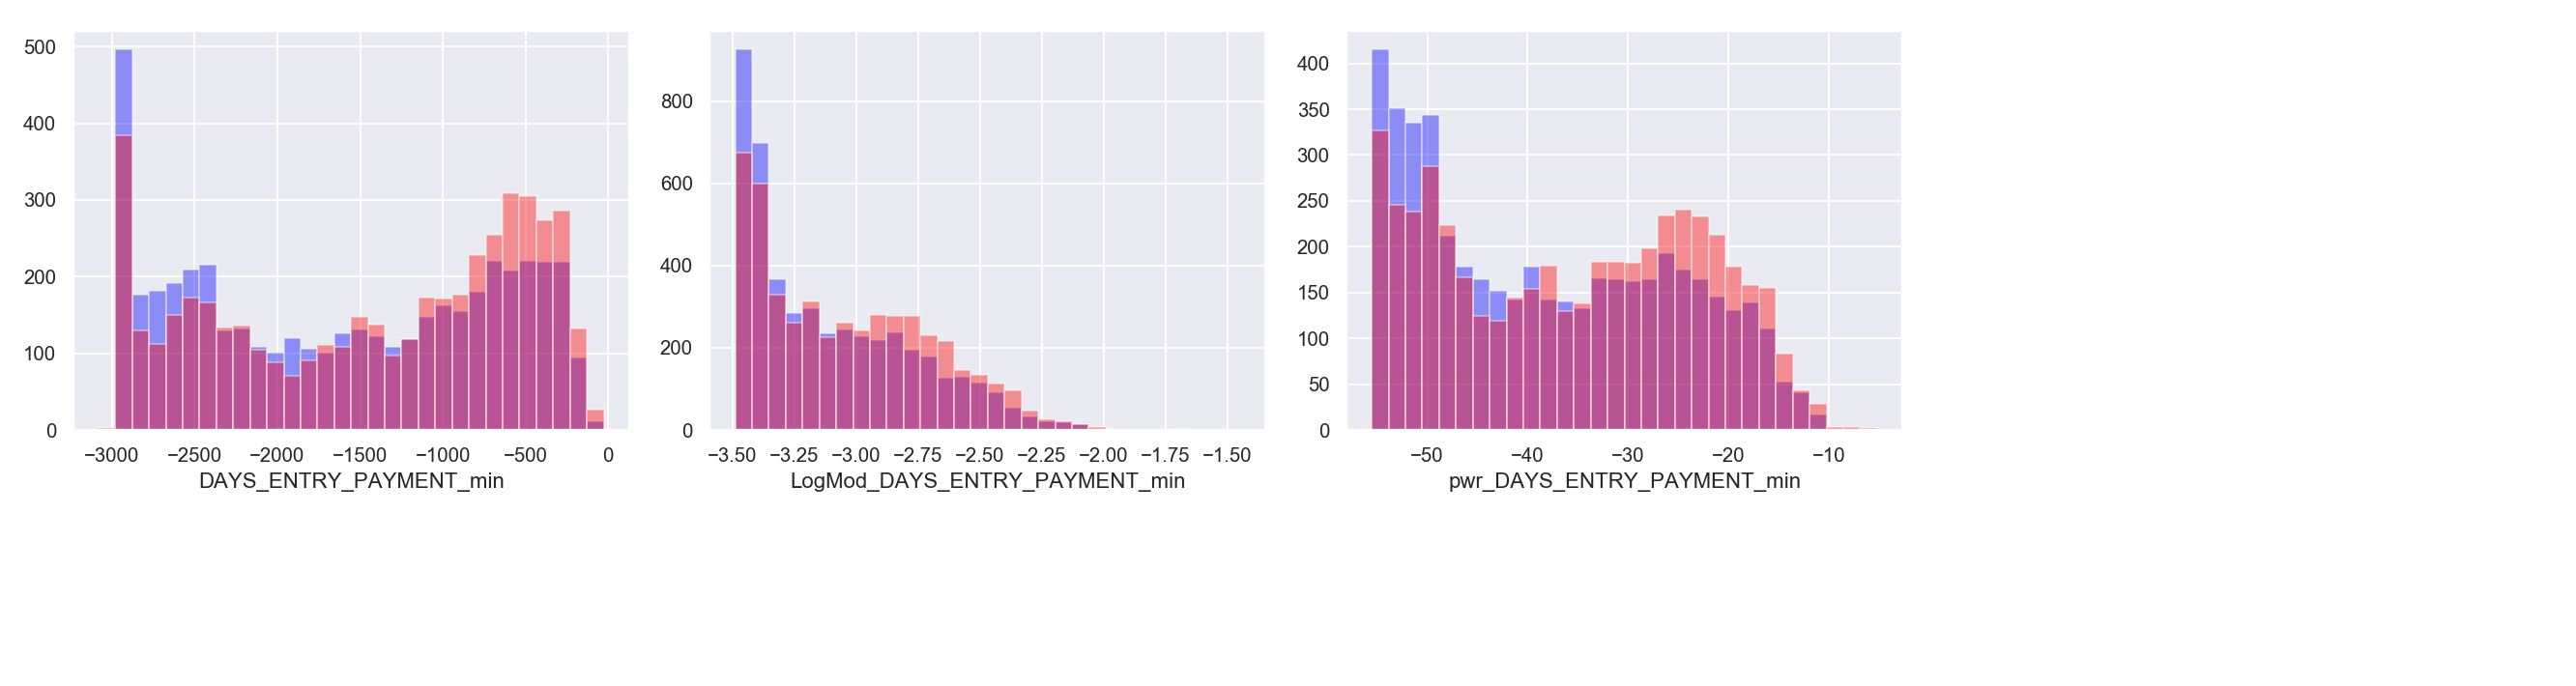

In [156]:
basic_plots(feats[25], 1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


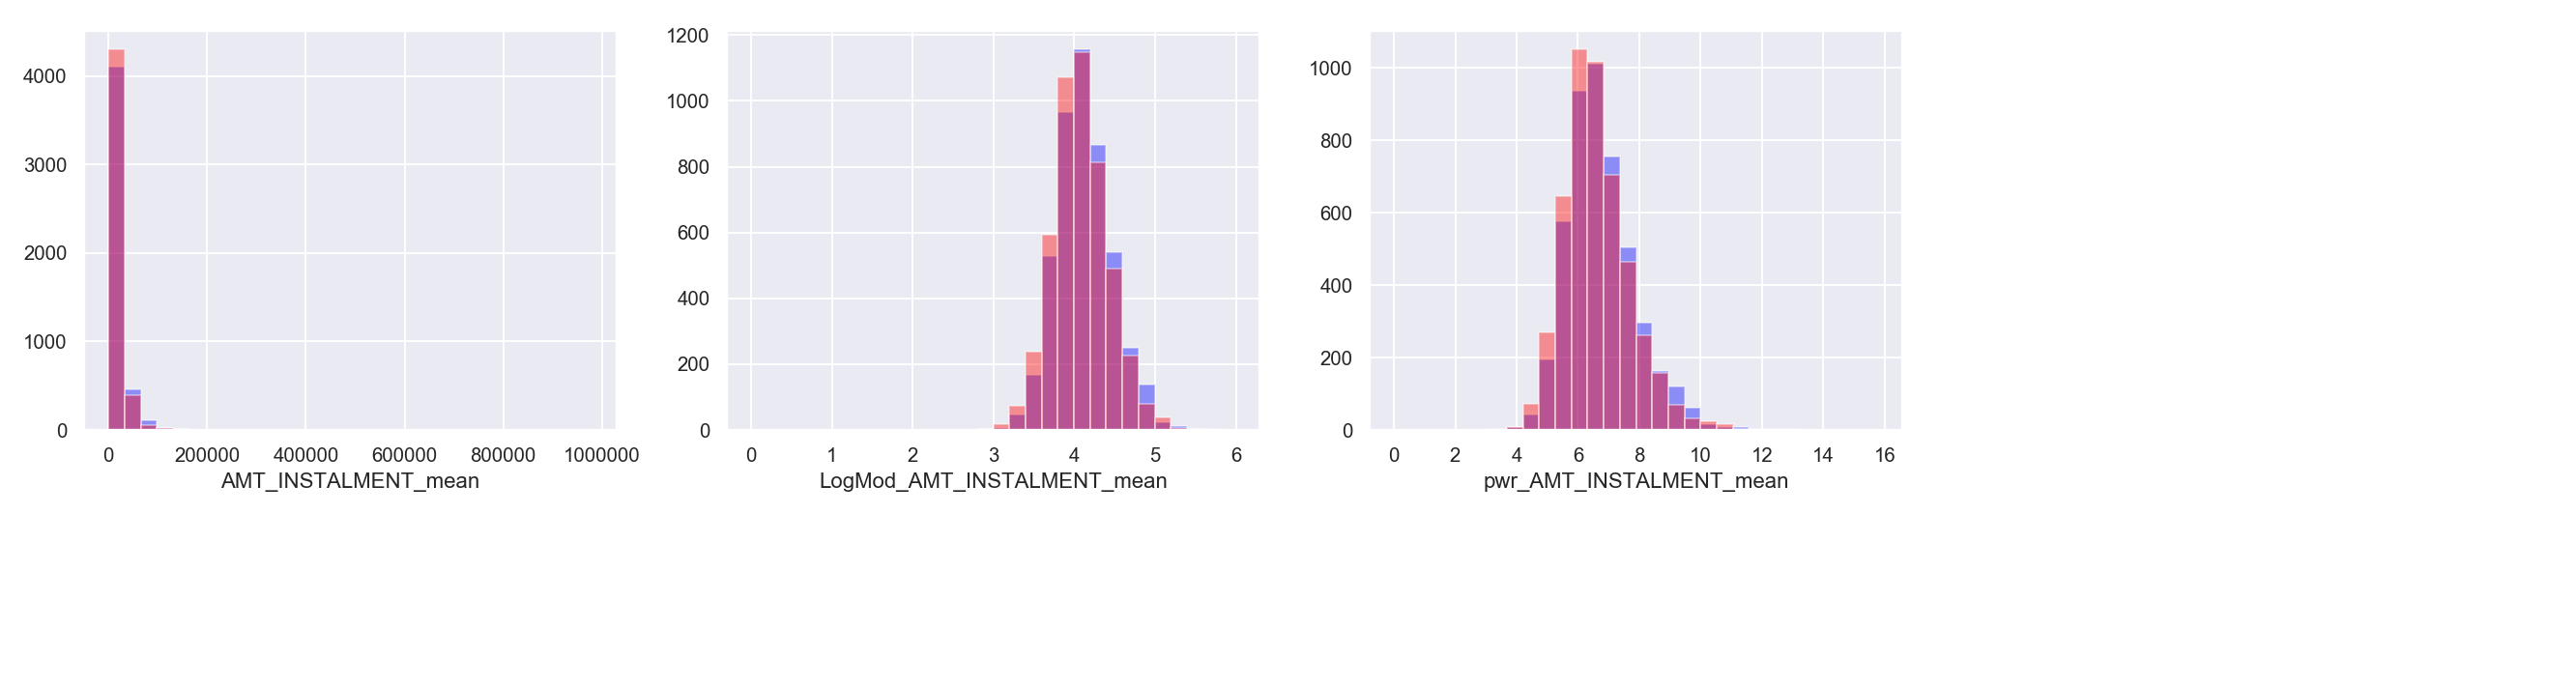

In [208]:
basic_plots(feats[26], 1/5, 30)

In [209]:
# just use mean above
#basic_plots(feats[27], 1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


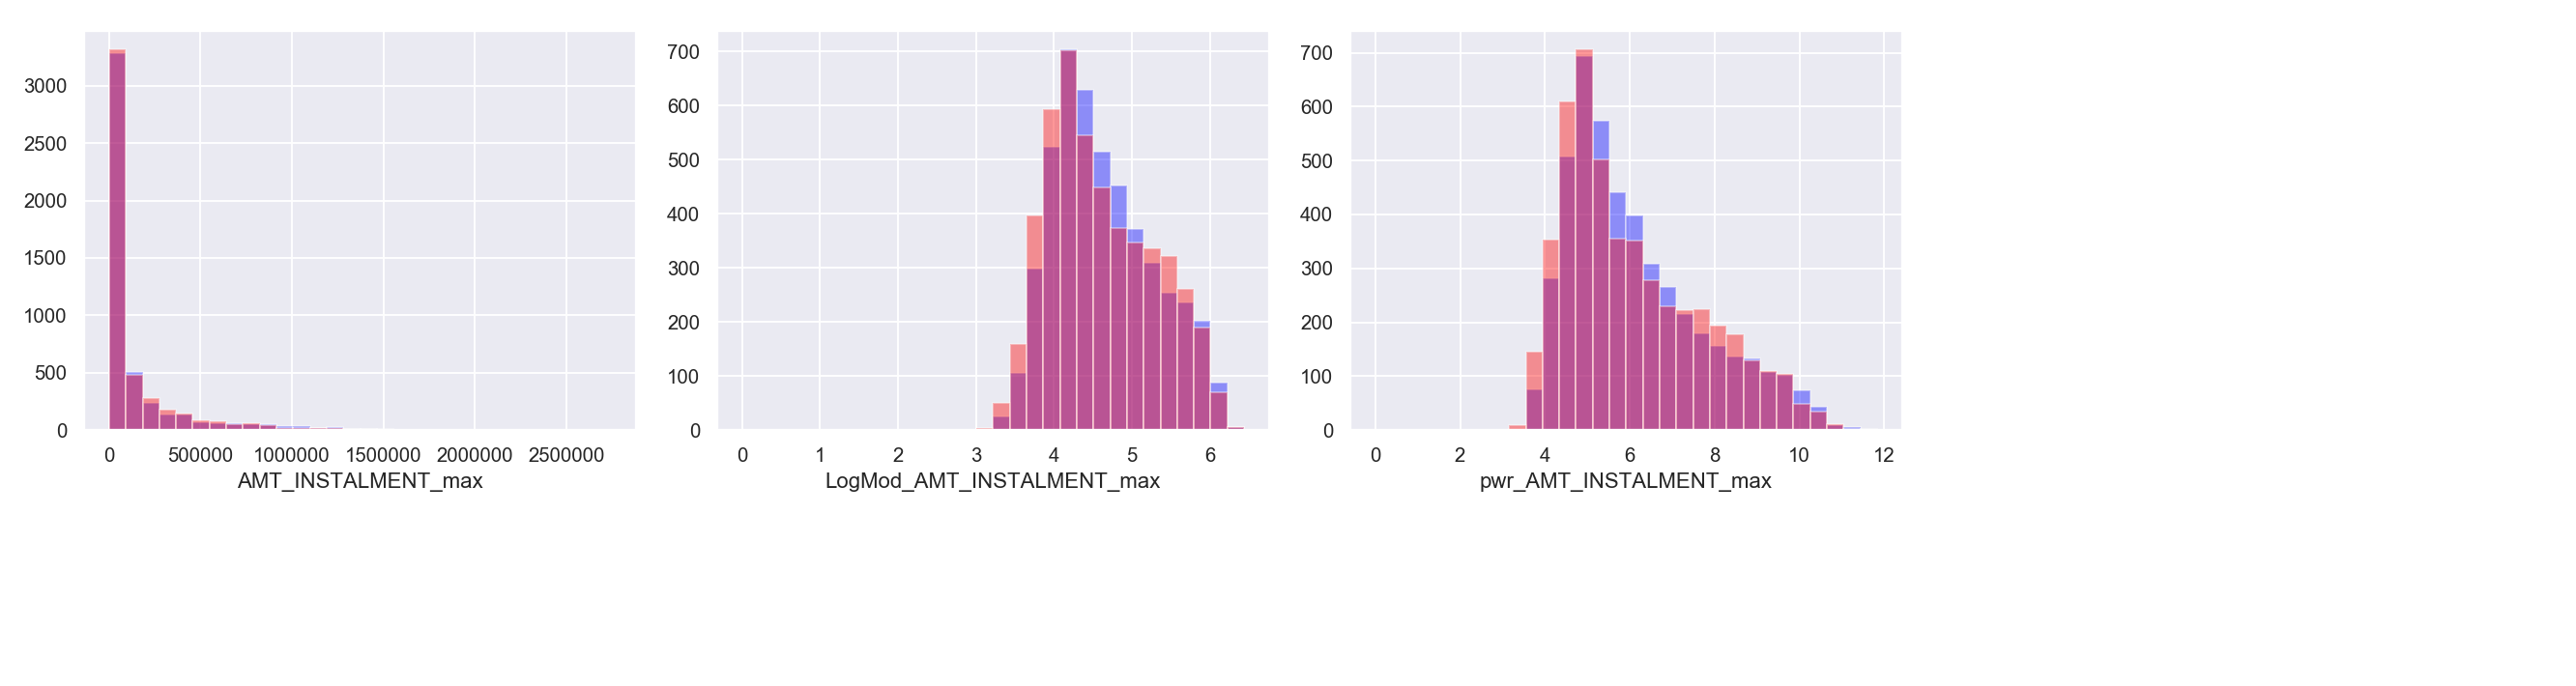

In [250]:
basic_plots(feats[28], 1/6, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


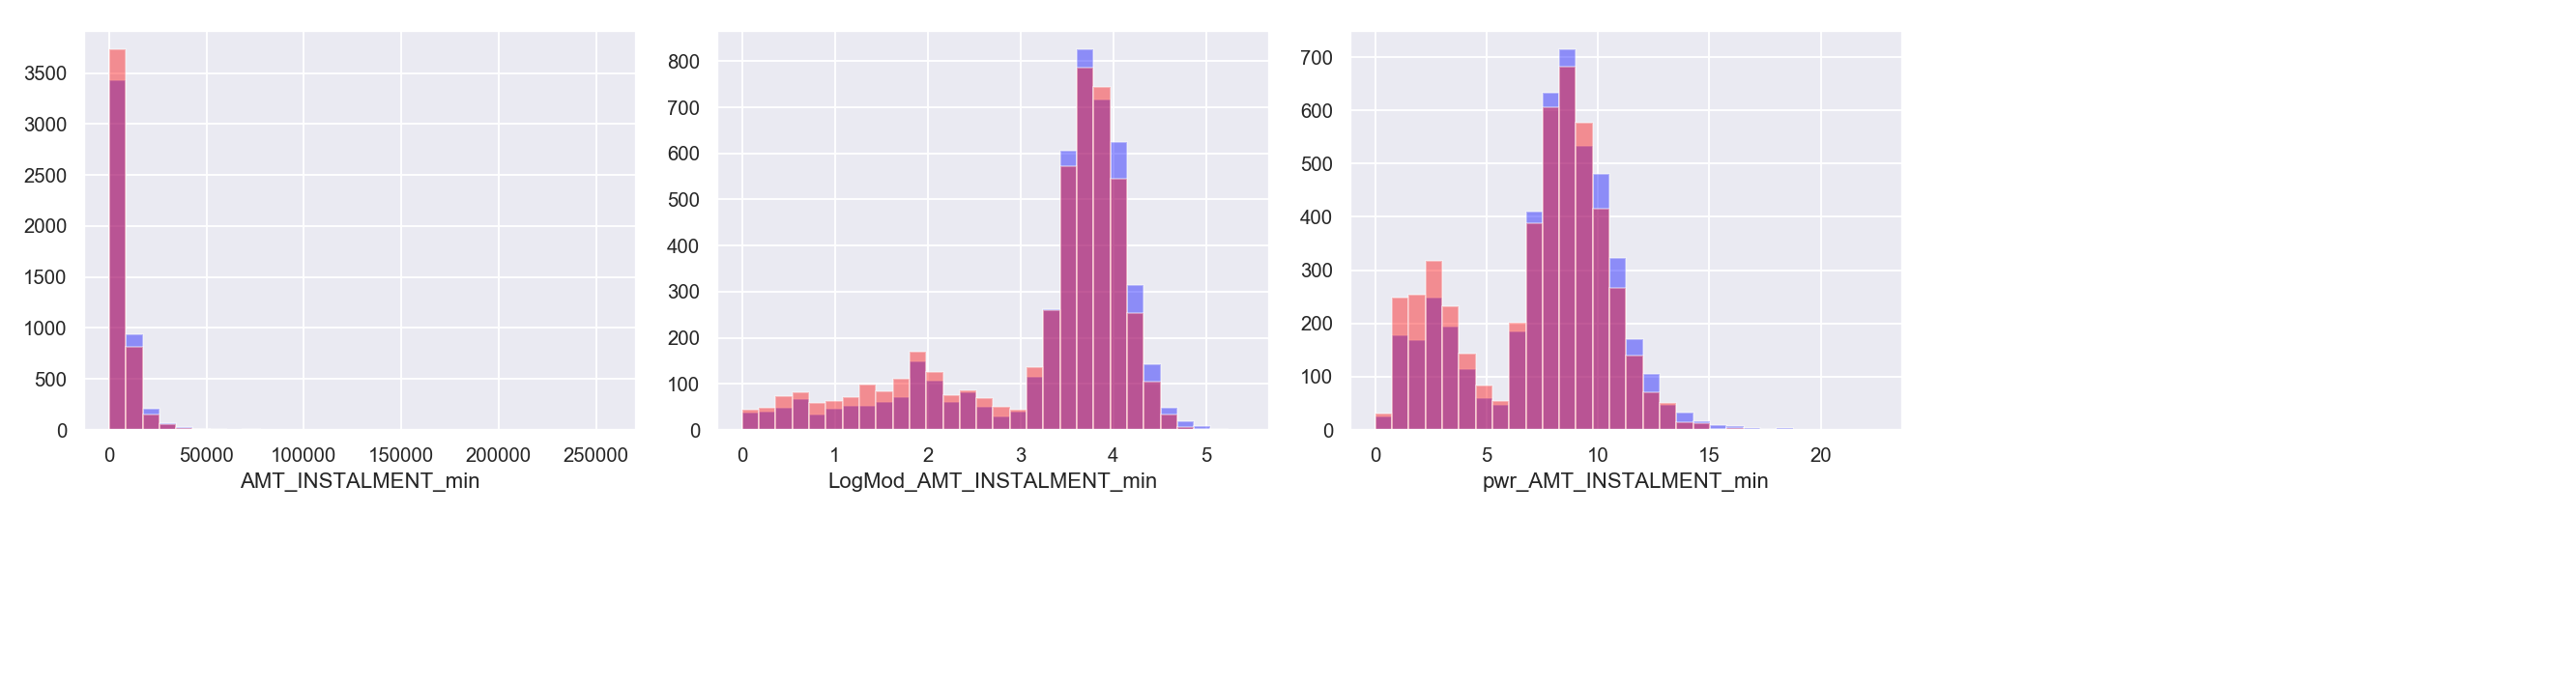

In [255]:
basic_plots(feats[29], 1/4, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


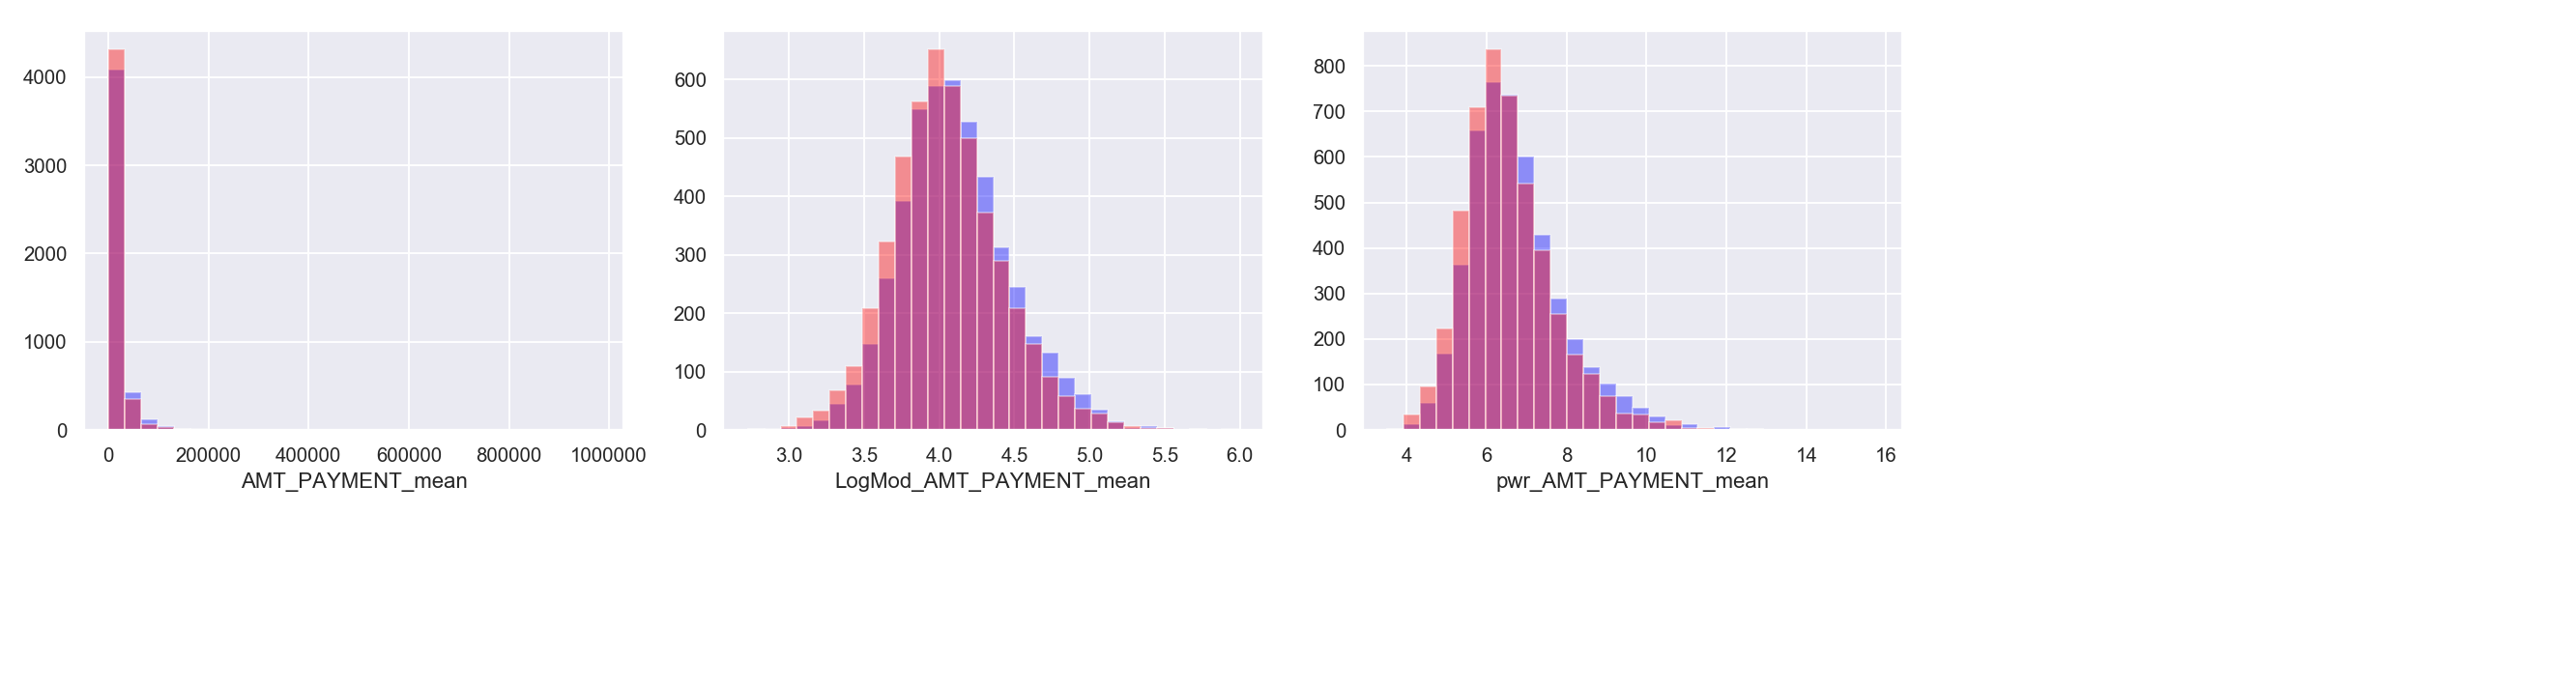

In [256]:
basic_plots(feats[30], 1/5, 30)

In [220]:
# just use mean above
#basic_plots(feats[31], 1/2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


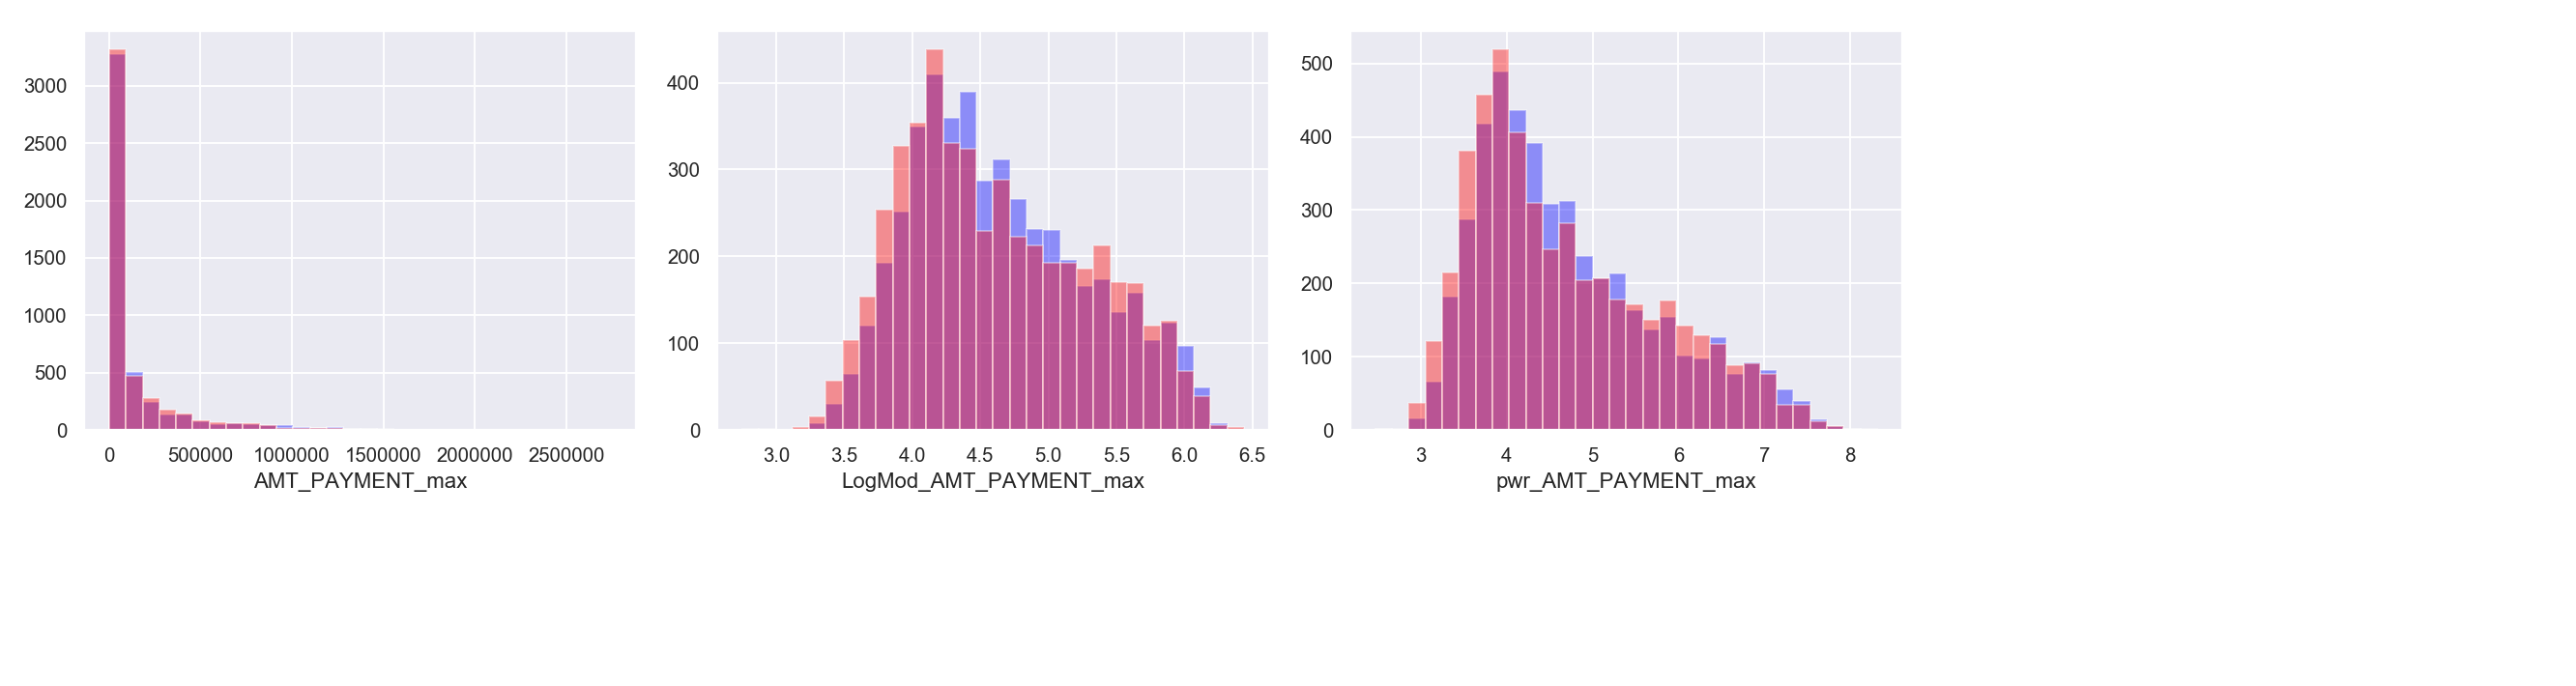

In [257]:
basic_plots(feats[32], 1/7, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


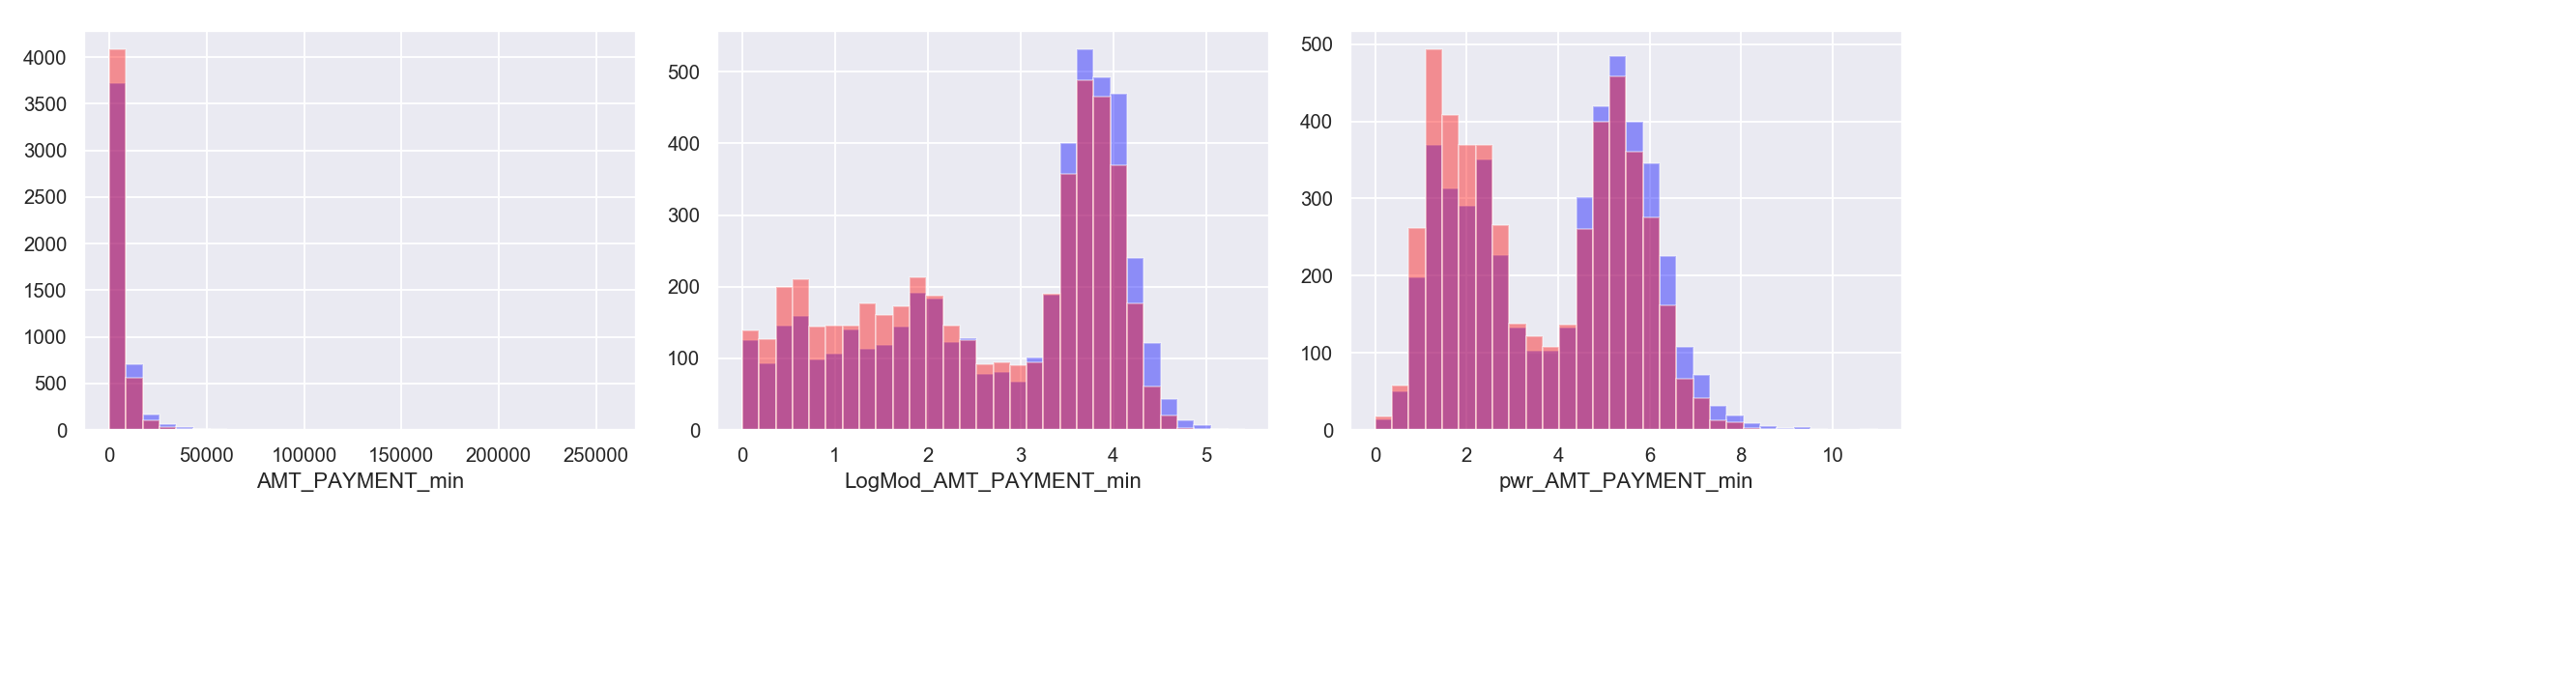

In [261]:
basic_plots(feats[33], 1/5.2, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


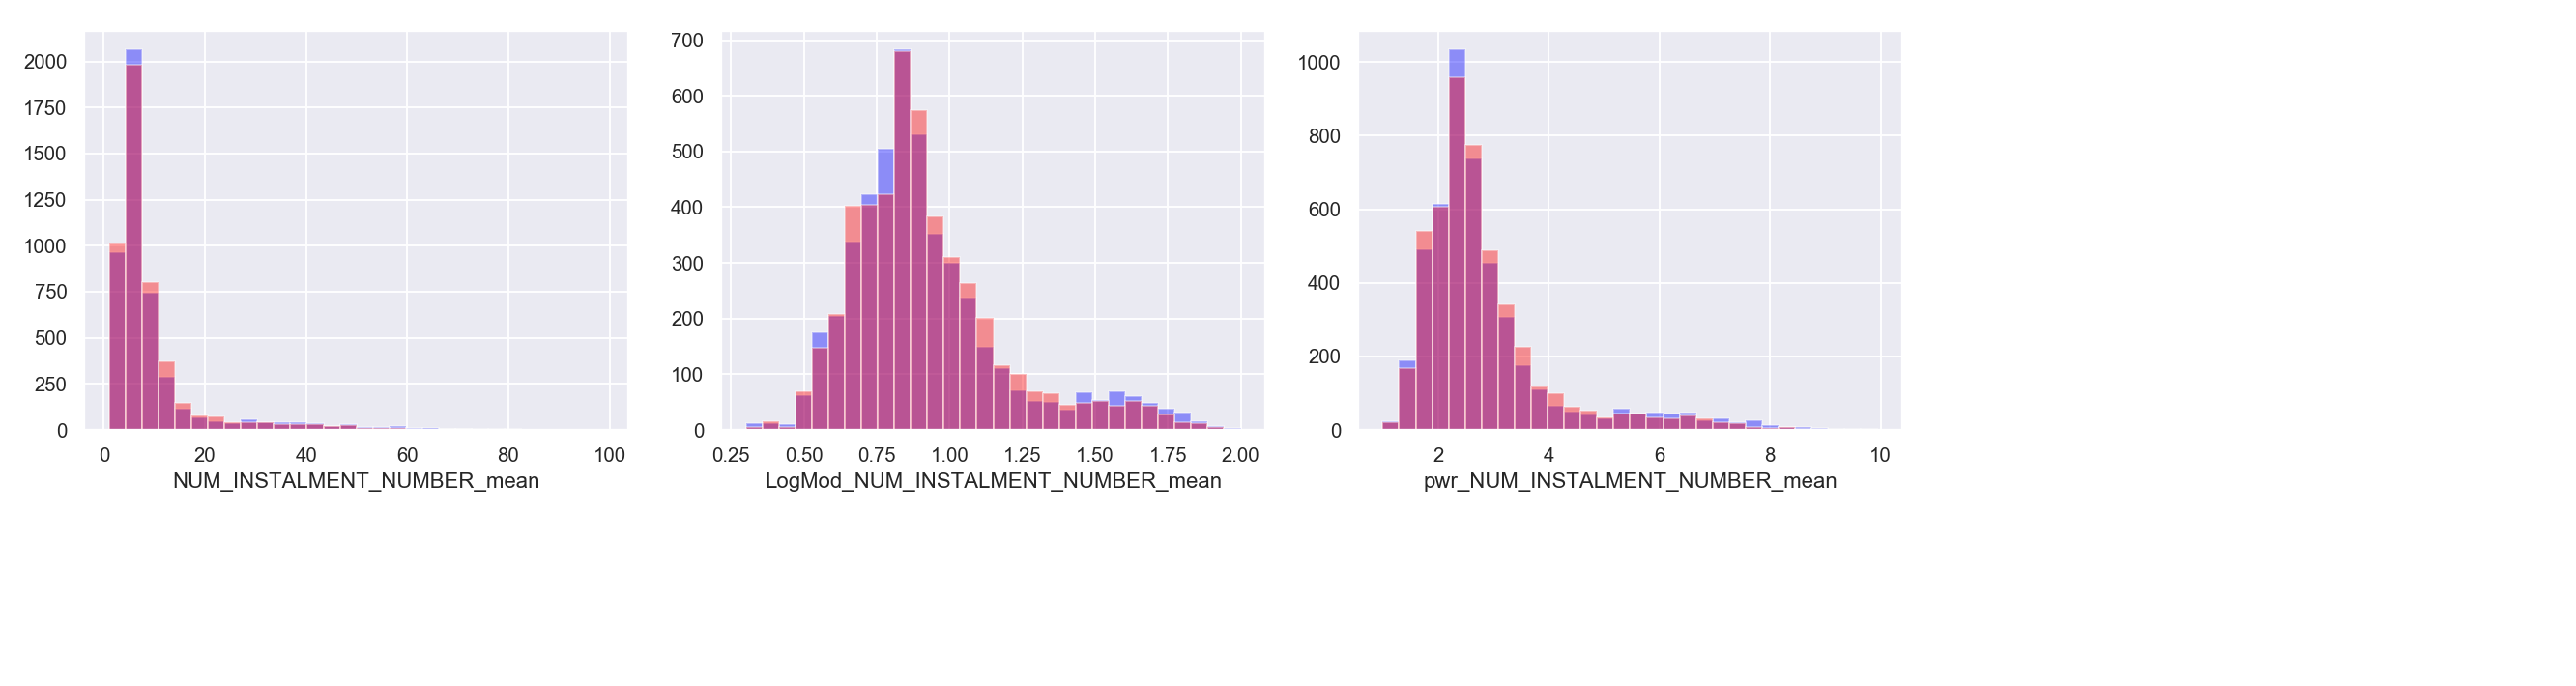

In [262]:
basic_plots(feats[34], 1/2, 30)

In [226]:
# just use mean above
#basic_plots(feats[35], 1/4, 30)

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


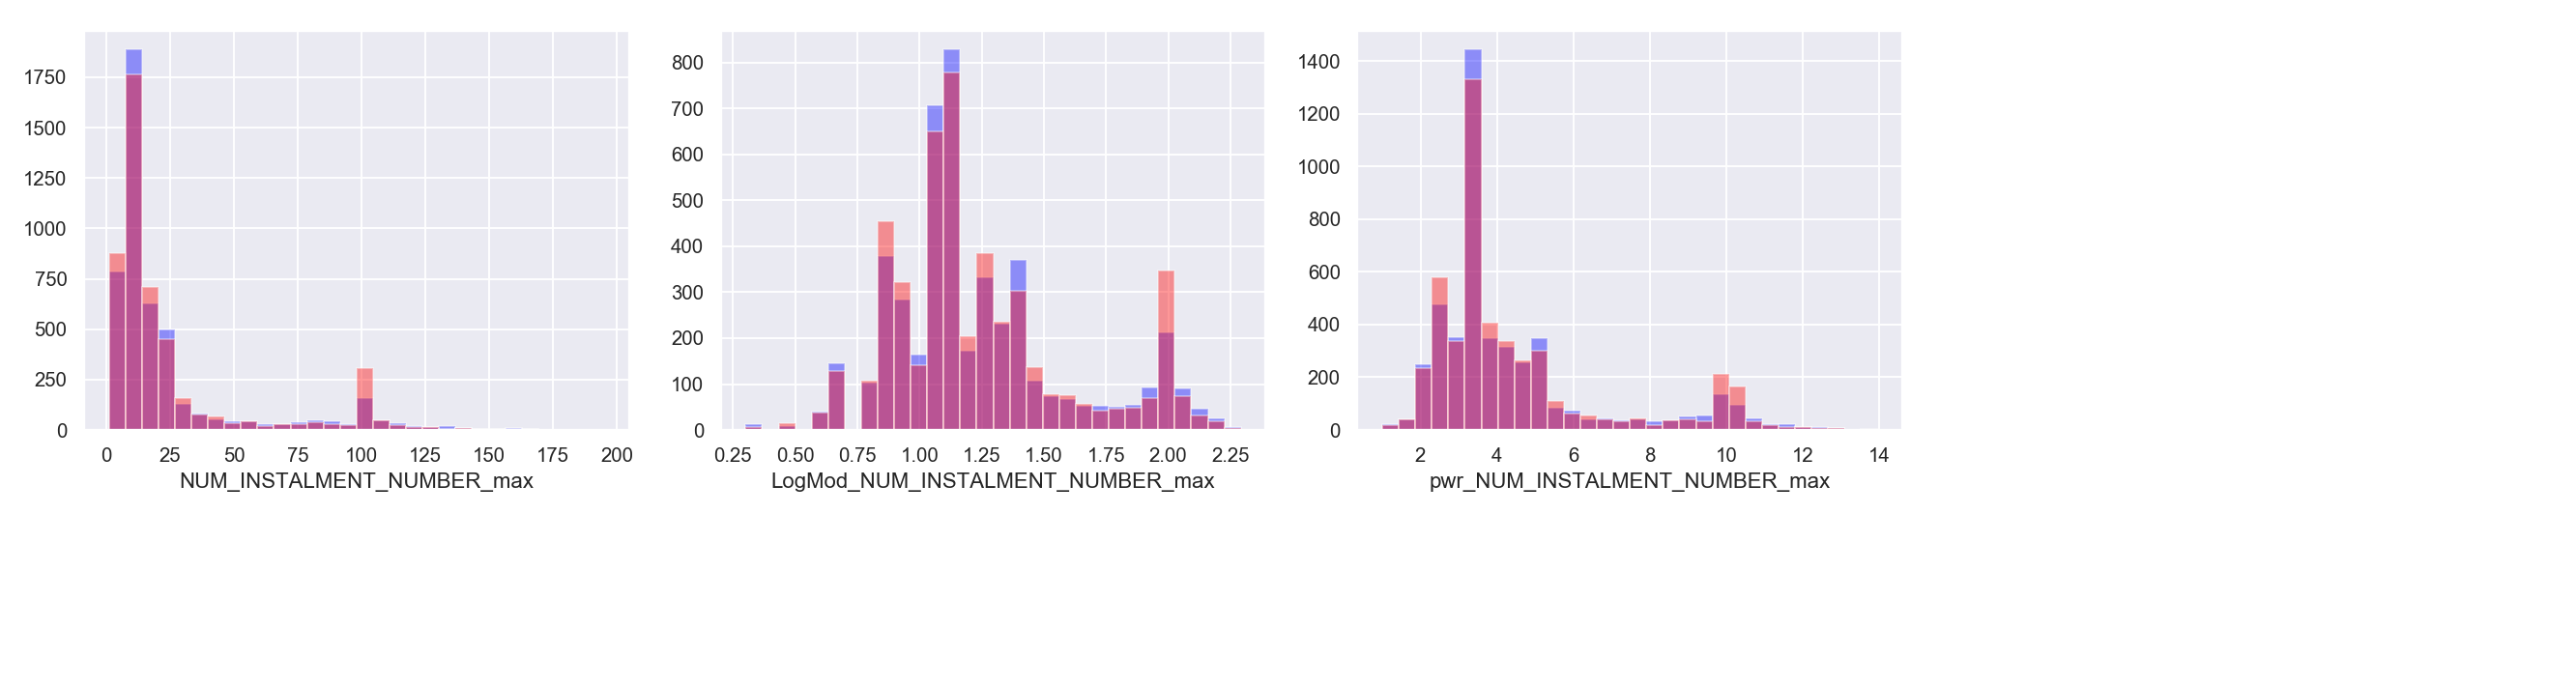

In [264]:
basic_plots(feats[36], 1/2, 30)

In [169]:
# no spread at all
#basic_plots(feats[37], 1/2, 30)